Installing libraries

In [5]:
# Import Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
from datetime import datetime

# Set style and ignore warnings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("📚 Libraries imported successfully!")
print("🎬 Ready to analyze the movie dataset!")

📚 Libraries imported successfully!
🎬 Ready to analyze the movie dataset!


In [6]:
# Load Dataset
# Define file paths
base_path = '/kaggle/input/the-movies-dataset/'
movies_path = base_path + 'movies_metadata.csv'
keywords_path = base_path + 'keywords.csv'
credits_path = base_path + 'credits.csv'
ratings_path = base_path + 'ratings_small.csv'

# Load the main dataset
print("📂 Loading datasets...")
movies_df = pd.read_csv(movies_path, low_memory=False)
keywords_df = pd.read_csv(keywords_path)
credits_df = pd.read_csv(credits_path)
ratings_df = pd.read_csv(ratings_path)

print(f"✅ Movies metadata loaded: {movies_df.shape[0]:,} rows, {movies_df.shape[1]} columns")
print(f"✅ Keywords loaded: {keywords_df.shape[0]:,} rows, {keywords_df.shape[1]} columns")
print(f"✅ Credits loaded: {credits_df.shape[0]:,} rows, {credits_df.shape[1]} columns")
print(f"✅ Ratings loaded: {ratings_df.shape[0]:,} rows, {ratings_df.shape[1]} columns")

# Display first few rows
print("\n🔍 First 5 rows of movies dataset:")
movies_df.head()

📂 Loading datasets...
✅ Movies metadata loaded: 45,466 rows, 24 columns
✅ Keywords loaded: 46,419 rows, 2 columns
✅ Credits loaded: 45,476 rows, 3 columns
✅ Ratings loaded: 100,004 rows, 4 columns

🔍 First 5 rows of movies dataset:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
# Initial Data Exploration
print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {movies_df.shape}")
print(f"Memory usage: {movies_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 Column Information:")
print(movies_df.columns.tolist())

print("\n🔍 Data Types:")
print(movies_df.dtypes)

print("\n📈 Basic Statistics for Numerical Columns:")
numerical_cols = movies_df.select_dtypes(include=[np.number]).columns
print(movies_df[numerical_cols].describe())

print("\n❌ Missing Values Analysis:")
missing_data = movies_df.isnull().sum()
missing_percentage = (missing_data / len(movies_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Percentage', ascending=False)

print(missing_df[missing_df.Missing_Count > 0])

📊 DATASET OVERVIEW
Dataset shape: (45466, 24)
Memory usage: 80.49 MB

📋 Column Information:
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']

🔍 Data Types:
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  f

In [8]:
# Data Cleaning
print("🧹 CLEANING DATA")
print("=" * 50)

# Create a copy for cleaning
movies_clean = movies_df.copy()

# Fix data types and handle problematic values
print("🔧 Fixing data types...")

# Fix ID column (some have invalid values)
movies_clean = movies_clean[movies_clean['id'].notna()]
movies_clean['id'] = pd.to_numeric(movies_clean['id'], errors='coerce')
movies_clean = movies_clean.dropna(subset=['id'])

# Convert budget and revenue to numeric
movies_clean['budget'] = pd.to_numeric(movies_clean['budget'], errors='coerce')
movies_clean['revenue'] = pd.to_numeric(movies_clean['revenue'], errors='coerce')

# Convert release_date to datetime
movies_clean['release_date'] = pd.to_datetime(movies_clean['release_date'], errors='coerce')

# Remove movies with missing critical data
print("🗑️ Removing movies with missing critical data...")
initial_count = len(movies_clean)

movies_clean = movies_clean.dropna(subset=['budget', 'revenue', 'release_date'])
movies_clean = movies_clean[(movies_clean['budget'] > 0) & (movies_clean['revenue'] > 0)]

final_count = len(movies_clean)
removed_count = initial_count - final_count

print(f"📉 Removed {removed_count:,} movies with missing/invalid data")
print(f"✅ Clean dataset: {final_count:,} movies")

# Handle outliers (remove extreme outliers)
print("📊 Handling outliers...")

# Calculate percentiles for budget and revenue
budget_q99 = movies_clean['budget'].quantile(0.99)
revenue_q99 = movies_clean['revenue'].quantile(0.99)

outliers_removed = len(movies_clean[(movies_clean['budget'] > budget_q99) | 
                                   (movies_clean['revenue'] > revenue_q99)])

movies_clean = movies_clean[(movies_clean['budget'] <= budget_q99) & 
                           (movies_clean['revenue'] <= revenue_q99)]

print(f"📉 Removed {outliers_removed} extreme outliers")
print(f"✅ Final clean dataset: {len(movies_clean):,} movies")

# Display cleaned data info
print(f"\n📊 Cleaned Data Summary:")
print(f"Time period: {movies_clean['release_date'].min().year} - {movies_clean['release_date'].max().year}")
print(f"Budget range: ${movies_clean['budget'].min():,.0f} - ${movies_clean['budget'].max():,.0f}")
print(f"Revenue range: ${movies_clean['revenue'].min():,.0f} - ${movies_clean['revenue'].max():,.0f}")

🧹 CLEANING DATA
🔧 Fixing data types...
🗑️ Removing movies with missing critical data...
📉 Removed 40,082 movies with missing/invalid data
✅ Clean dataset: 5,381 movies
📊 Handling outliers...
📉 Removed 68 extreme outliers
✅ Final clean dataset: 5,313 movies

📊 Cleaned Data Summary:
Time period: 1915 - 2017
Budget range: $1 - $200,000,000
Revenue range: $1 - $850,000,000


In [9]:
# Feature Engineering
print("⚙️ FEATURE ENGINEERING")
print("=" * 50)

# Create new features
print("🆕 Creating new features...")

# Financial metrics
movies_clean['ROI'] = movies_clean['revenue'] / movies_clean['budget']
movies_clean['profit'] = movies_clean['revenue'] - movies_clean['budget']
movies_clean['budget_millions'] = movies_clean['budget'] / 1e6
movies_clean['revenue_millions'] = movies_clean['revenue'] / 1e6
movies_clean['profit_millions'] = movies_clean['profit'] / 1e6

# Time-based features
movies_clean['release_year'] = movies_clean['release_date'].dt.year
movies_clean['release_month'] = movies_clean['release_date'].dt.month
movies_clean['release_day'] = movies_clean['release_date'].dt.day
movies_clean['release_weekday'] = movies_clean['release_date'].dt.dayofweek

# Popularity metrics
movies_clean['popularity'] = pd.to_numeric(movies_clean['popularity'], errors='coerce')
movies_clean['vote_count'] = pd.to_numeric(movies_clean['vote_count'], errors='coerce')
movies_clean['vote_average'] = pd.to_numeric(movies_clean['vote_average'], errors='coerce')

# Success categories based on ROI
movies_clean['success_level'] = pd.cut(movies_clean['ROI'], 
                                      bins=[0, 1, 2, 5, float('inf')], 
                                      labels=['Loss', 'Break-even', 'Profitable', 'Highly Profitable'])

# Budget categories
movies_clean['budget_category'] = pd.cut(movies_clean['budget_millions'], 
                                        bins=[0, 5, 25, 100, float('inf')], 
                                        labels=['Low Budget', 'Medium Budget', 'High Budget', 'Blockbuster'])

print("✅ Features created successfully!")

# Display new features summary
print(f"\n📊 New Features Summary:")
print(f"Average ROI: {movies_clean['ROI'].mean():.2f}x")
print(f"Average profit: ${movies_clean['profit_millions'].mean():.1f}M")
print(f"Release year range: {movies_clean['release_year'].min()} - {movies_clean['release_year'].max()}")

print(f"\n🎯 Success Level Distribution:")
print(movies_clean['success_level'].value_counts())

print(f"\n💰 Budget Category Distribution:")
print(movies_clean['budget_category'].value_counts())

# Display sample of engineered features
print(f"\n🔍 Sample of Engineered Features:")
feature_cols = ['title', 'budget_millions', 'revenue_millions', 'ROI', 'profit_millions', 
               'release_year', 'success_level', 'budget_category']
movies_clean[feature_cols].head(10)

⚙️ FEATURE ENGINEERING
🆕 Creating new features...
✅ Features created successfully!

📊 New Features Summary:
Average ROI: 5637.06x
Average profit: $49.8M
Release year range: 1915 - 2017

🎯 Success Level Distribution:
success_level
Loss                 1624
Profitable           1620
Highly Profitable    1060
Break-even           1009
Name: count, dtype: int64

💰 Budget Category Distribution:
budget_category
Medium Budget    2060
High Budget      1639
Low Budget       1345
Blockbuster       269
Name: count, dtype: int64

🔍 Sample of Engineered Features:


,title,budget_millions,revenue_millions,ROI,profit_millions,release_year,success_level,budget_category
0,Toy Story,30.0,373.554033,12.451801,343.554033,1995,Highly Profitable,High Budget
1,Jumanji,65.0,262.797249,4.043035,197.797249,1995,Profitable,High Budget
3,Waiting to Exhale,16.0,81.452156,5.090760,65.452156,1995,Highly Profitable,Medium Budget
5,Heat,60.0,187.436818,3.123947,127.436818,1995,Profitable,High Budget
8,Sudden Death,35.0,64.350171,1.838576,29.350171,1995,Break-even,High Budget
9,GoldenEye,58.0,352.194034,6.072311,294.194034,1995,Highly Profitable,High Budget
10,The American President,62.0,107.879496,1.739992,45.879496,1995,Break-even,High Budget
13,Nixon,44.0,13.681765,0.310949,-30.318235,1995,Loss,High Budget
14,Cutthroat Island,98.0,10.017322,0.102218,-87.982678,1995,Loss,High Budget
15,Casino,52.0,116.112375,2.232930,64.112375,1995,Profitable,High Budget


💰 REVENUE DISTRIBUTION ANALYSIS


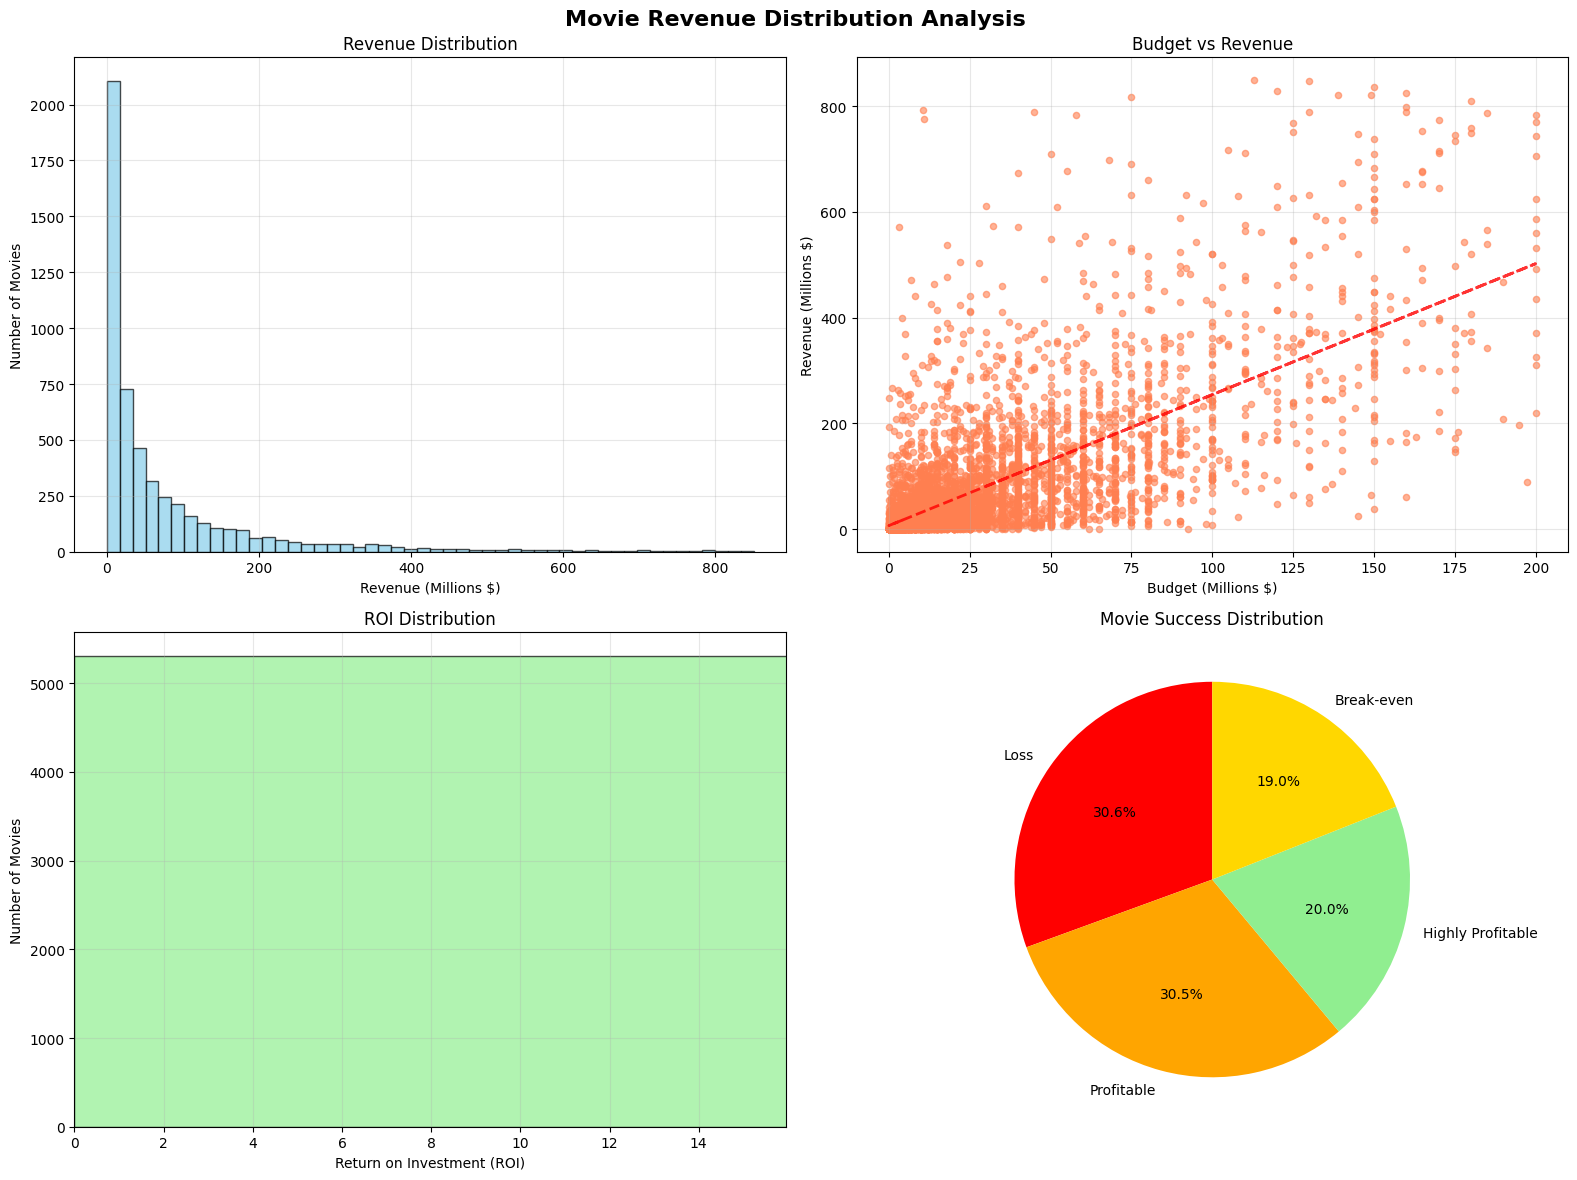

📊 REVENUE STATISTICS
------------------------------
Total Movies: 5,313
Total Revenue: $418.7 billion
Average Revenue: $78.8 million
Median Revenue: $29.0 million
Average Budget: $29.0 million
Average ROI: 5637.06x
Average Profit: $49.8 million

🏆 TOP 10 HIGHEST GROSSING MOVIES:
10070. Star Wars: Episode III - Revenge of the  (2005) - $850M
22059. The Hunger Games: Catching Fire          (2013) - $847M
13834. Transformers: Revenge of the Fallen      (2009) - $836M
19815. The Twilight Saga: Breaking Dawn - Part  (2012) - $829M
15481. Inception                                (2010) - $826M
5216. Spider-Man                               (2002) - $822M
33357. Wonder Woman                             (2017) - $821M
761. Independence Day                         (1996) - $817M
30402. Fantastic Beasts and Where to Find Them  (2016) - $809M
11826. Shrek the Third                          (2007) - $799M

🎯 TOP 10 HIGHEST ROI MOVIES:
4001. Less Than Zero                           (1987) - ROI: 12

In [10]:
# Revenue Distribution Analysis
print("💰 REVENUE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Create subplots for comprehensive revenue analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Movie Revenue Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Revenue Distribution (Log Scale)
axes[0,0].hist(movies_clean['revenue_millions'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Revenue (Millions $)')
axes[0,0].set_ylabel('Number of Movies')
axes[0,0].set_title('Revenue Distribution')
axes[0,0].grid(True, alpha=0.3)

# 2. Budget vs Revenue Scatter Plot
axes[0,1].scatter(movies_clean['budget_millions'], movies_clean['revenue_millions'], 
                 alpha=0.6, color='coral', s=20)
axes[0,1].set_xlabel('Budget (Millions $)')
axes[0,1].set_ylabel('Revenue (Millions $)')
axes[0,1].set_title('Budget vs Revenue')
axes[0,1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(movies_clean['budget_millions'], movies_clean['revenue_millions'], 1)
p = np.poly1d(z)
axes[0,1].plot(movies_clean['budget_millions'], p(movies_clean['budget_millions']), 
               "r--", alpha=0.8, linewidth=2)

# 3. ROI Distribution
axes[1,0].hist(movies_clean['ROI'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_xlabel('Return on Investment (ROI)')
axes[1,0].set_ylabel('Number of Movies')
axes[1,0].set_title('ROI Distribution')
axes[1,0].set_xlim(0, movies_clean['ROI'].quantile(0.95))  # Remove extreme outliers for better view
axes[1,0].grid(True, alpha=0.3)

# 4. Success Level Distribution
success_counts = movies_clean['success_level'].value_counts()
axes[1,1].pie(success_counts.values, labels=success_counts.index, autopct='%1.1f%%', 
              startangle=90, colors=['red', 'orange', 'lightgreen', 'gold'])
axes[1,1].set_title('Movie Success Distribution')

plt.tight_layout()
plt.show()

# Print statistical summary
print("📊 REVENUE STATISTICS")
print("-" * 30)
print(f"Total Movies: {len(movies_clean):,}")
print(f"Total Revenue: ${movies_clean['revenue'].sum()/1e9:.1f} billion")
print(f"Average Revenue: ${movies_clean['revenue_millions'].mean():.1f} million")
print(f"Median Revenue: ${movies_clean['revenue_millions'].median():.1f} million")
print(f"Average Budget: ${movies_clean['budget_millions'].mean():.1f} million")
print(f"Average ROI: {movies_clean['ROI'].mean():.2f}x")
print(f"Average Profit: ${movies_clean['profit_millions'].mean():.1f} million")

# Top performers
print(f"\n🏆 TOP 10 HIGHEST GROSSING MOVIES:")
top_movies = movies_clean.nlargest(10, 'revenue_millions')[['title', 'release_year', 'revenue_millions', 'budget_millions', 'ROI']]
for idx, row in top_movies.iterrows():
    print(f"{row.name+1:2d}. {row['title'][:40]:40} ({row['release_year']}) - ${row['revenue_millions']:,.0f}M")

print(f"\n🎯 TOP 10 HIGHEST ROI MOVIES:")
top_roi = movies_clean.nlargest(10, 'ROI')[['title', 'release_year', 'revenue_millions', 'budget_millions', 'ROI']]
for idx, row in top_roi.iterrows():
    print(f"{row.name+1:2d}. {row['title'][:40]:40} ({row['release_year']}) - ROI: {row['ROI']:.1f}x")

🎭 GENRE ANALYSIS
🔍 Extracting genres...
✅ Extracted 13786 movie-genre combinations
📊 Analyzing 19 genres with 20+ movies each


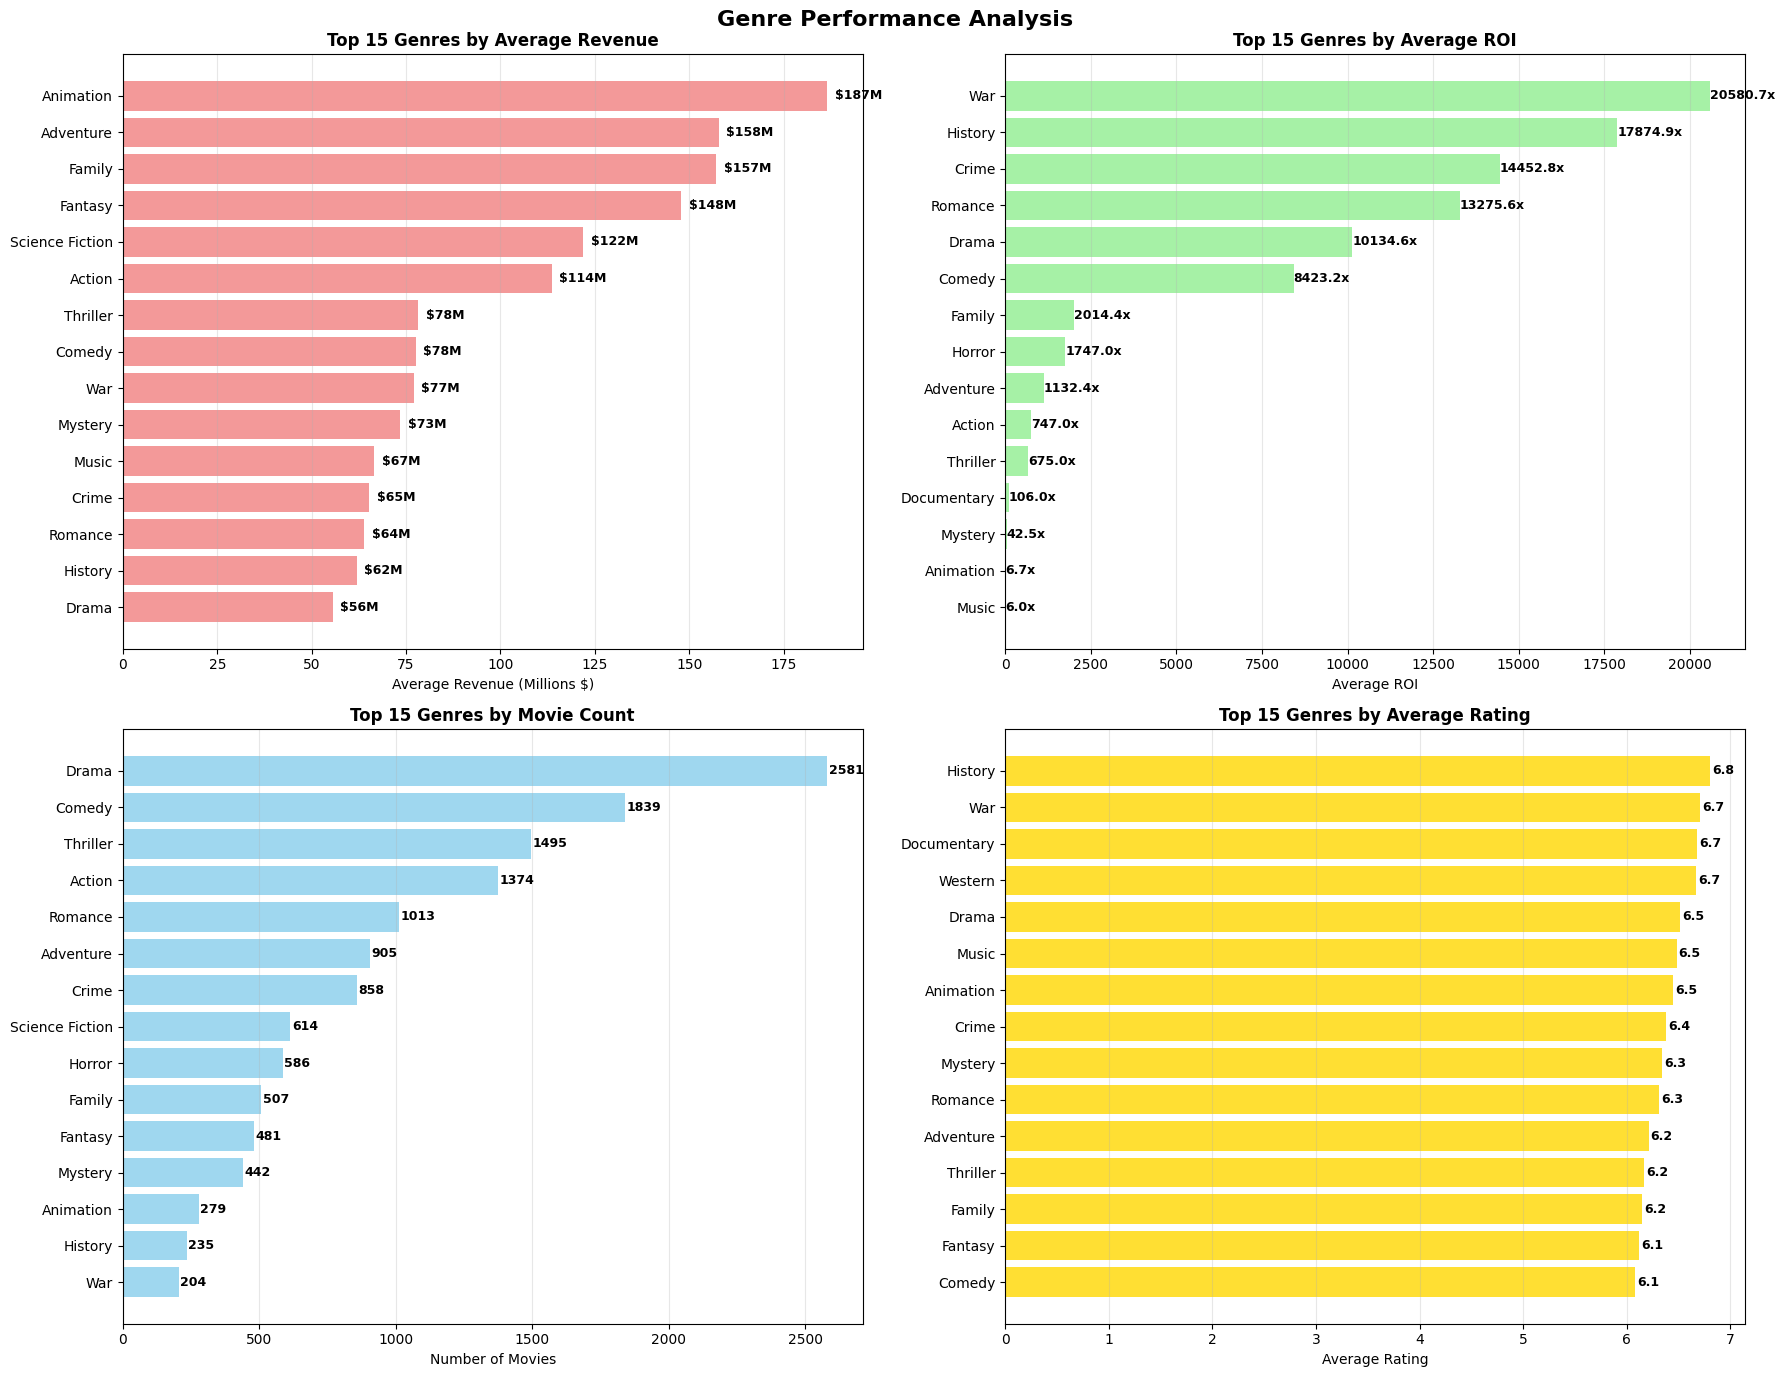

🏆 TOP 10 GENRES BY AVERAGE REVENUE:
------------------------------------------------------------
 3. Animation       - $ 186.5M avg (ROI:  6.7x, 279 movies)
 2. Adventure       - $ 157.8M avg (ROI: 1132.4x, 905 movies)
 8. Family          - $ 157.1M avg (ROI: 2014.4x, 507 movies)
 9. Fantasy         - $ 147.9M avg (ROI:  6.0x, 481 movies)
16. Science Fiction - $ 122.0M avg (ROI:  5.3x, 614 movies)
 1. Action          - $ 113.6M avg (ROI: 747.0x, 1374 movies)
18. Thriller        - $  78.2M avg (ROI: 675.0x, 1495 movies)
 4. Comedy          - $  77.5M avg (ROI: 8423.2x, 1839 movies)
19. War             - $  77.0M avg (ROI: 20580.7x, 204 movies)
14. Mystery         - $  73.4M avg (ROI: 42.5x, 442 movies)

🎯 KEY GENRE INSIGHTS:
• Most Profitable Genre: Animation ($186.5M avg)
• Highest ROI Genre: War (20580.7x avg)
• Most Popular Genre: Drama (2581 movies)
• Highest Rated Genre: History (6.8/10 avg)

🔗 GENRE COMBINATION ANALYSIS:
• Average genres per movie: 2.6
• Movies with multiple genre

In [11]:
# Genre Analysis
print("🎭 GENRE ANALYSIS")
print("=" * 50)

# Function to safely extract genres
def extract_genres(genres_str):
    if pd.isna(genres_str):
        return []
    try:
        genres_list = ast.literal_eval(genres_str)
        if isinstance(genres_list, list):
            return [genre['name'] for genre in genres_list if isinstance(genre, dict) and 'name' in genre]
        return []
    except:
        return []

# Extract genres
print("🔍 Extracting genres...")
movies_clean['genres_list'] = movies_clean['genres'].apply(extract_genres)

# Explode genres for analysis
genres_exploded = movies_clean.explode('genres_list').dropna(subset=['genres_list'])
print(f"✅ Extracted {len(genres_exploded)} movie-genre combinations")

# Analyze genre performance
genre_stats = genres_exploded.groupby('genres_list').agg({
    'revenue_millions': ['mean', 'median', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean',
    'vote_average': 'mean',
    'popularity': 'mean'
}).round(2)

genre_stats.columns = ['Avg_Revenue', 'Median_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating', 'Avg_Popularity']
genre_stats = genre_stats.reset_index()

# Filter genres with at least 20 movies for statistical significance
genre_stats = genre_stats[genre_stats['Movie_Count'] >= 20]
genre_stats = genre_stats.sort_values('Avg_Revenue', ascending=False)

print(f"📊 Analyzing {len(genre_stats)} genres with 20+ movies each")

# Create comprehensive genre visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Genre Performance Analysis', fontsize=16, fontweight='bold')

# 1. Top genres by average revenue
top_15_revenue = genre_stats.head(15)
bars1 = axes[0,0].barh(top_15_revenue['genres_list'], top_15_revenue['Avg_Revenue'], 
                       color='lightcoral', alpha=0.8)
axes[0,0].set_title('Top 15 Genres by Average Revenue', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Average Revenue (Millions $)')
axes[0,0].invert_yaxis()
axes[0,0].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, top_15_revenue['Avg_Revenue']):
    axes[0,0].text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
                   f'${value:.0f}M', va='center', fontsize=9, fontweight='bold')

# 2. Top genres by ROI
top_15_roi = genre_stats.sort_values('Avg_ROI', ascending=False).head(15)
bars2 = axes[0,1].barh(top_15_roi['genres_list'], top_15_roi['Avg_ROI'], 
                       color='lightgreen', alpha=0.8)
axes[0,1].set_title('Top 15 Genres by Average ROI', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Average ROI')
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, top_15_roi['Avg_ROI']):
    axes[0,1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                   f'{value:.1f}x', va='center', fontsize=9, fontweight='bold')

# 3. Movie count by genre
top_15_count = genre_stats.sort_values('Movie_Count', ascending=False).head(15)
bars3 = axes[1,0].barh(top_15_count['genres_list'], top_15_count['Movie_Count'], 
                       color='skyblue', alpha=0.8)
axes[1,0].set_title('Top 15 Genres by Movie Count', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Number of Movies')
axes[1,0].invert_yaxis()
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars3, top_15_count['Movie_Count']):
    axes[1,0].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                   f'{value:.0f}', va='center', fontsize=9, fontweight='bold')

# 4. Average rating by genre
top_15_rating = genre_stats.sort_values('Avg_Rating', ascending=False).head(15)
bars4 = axes[1,1].barh(top_15_rating['genres_list'], top_15_rating['Avg_Rating'], 
                       color='gold', alpha=0.8)
axes[1,1].set_title('Top 15 Genres by Average Rating', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average Rating')
axes[1,1].invert_yaxis()
axes[1,1].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars4, top_15_rating['Avg_Rating']):
    axes[1,1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
                   f'{value:.1f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed genre analysis
print("🏆 TOP 10 GENRES BY AVERAGE REVENUE:")
print("-" * 60)
for idx, row in genre_stats.head(10).iterrows():
    print(f"{idx+1:2d}. {row['genres_list']:15} - ${row['Avg_Revenue']:6.1f}M avg (ROI: {row['Avg_ROI']:4.1f}x, {row['Movie_Count']:3.0f} movies)")

print(f"\n🎯 KEY GENRE INSIGHTS:")
print(f"• Most Profitable Genre: {genre_stats.iloc[0]['genres_list']} (${genre_stats.iloc[0]['Avg_Revenue']:.1f}M avg)")
print(f"• Highest ROI Genre: {top_15_roi.iloc[0]['genres_list']} ({top_15_roi.iloc[0]['Avg_ROI']:.1f}x avg)")
print(f"• Most Popular Genre: {top_15_count.iloc[0]['genres_list']} ({top_15_count.iloc[0]['Movie_Count']:.0f} movies)")
print(f"• Highest Rated Genre: {top_15_rating.iloc[0]['genres_list']} ({top_15_rating.iloc[0]['Avg_Rating']:.1f}/10 avg)")

# Genre combination analysis
print(f"\n🔗 GENRE COMBINATION ANALYSIS:")
movies_with_genres = movies_clean[movies_clean['genres_list'].apply(len) > 1]
avg_genres_per_movie = movies_clean['genres_list'].apply(len).mean()
print(f"• Average genres per movie: {avg_genres_per_movie:.1f}")
print(f"• Movies with multiple genres: {len(movies_with_genres):,} ({len(movies_with_genres)/len(movies_clean)*100:.1f}%)")

📅 RELEASE TIMING ANALYSIS


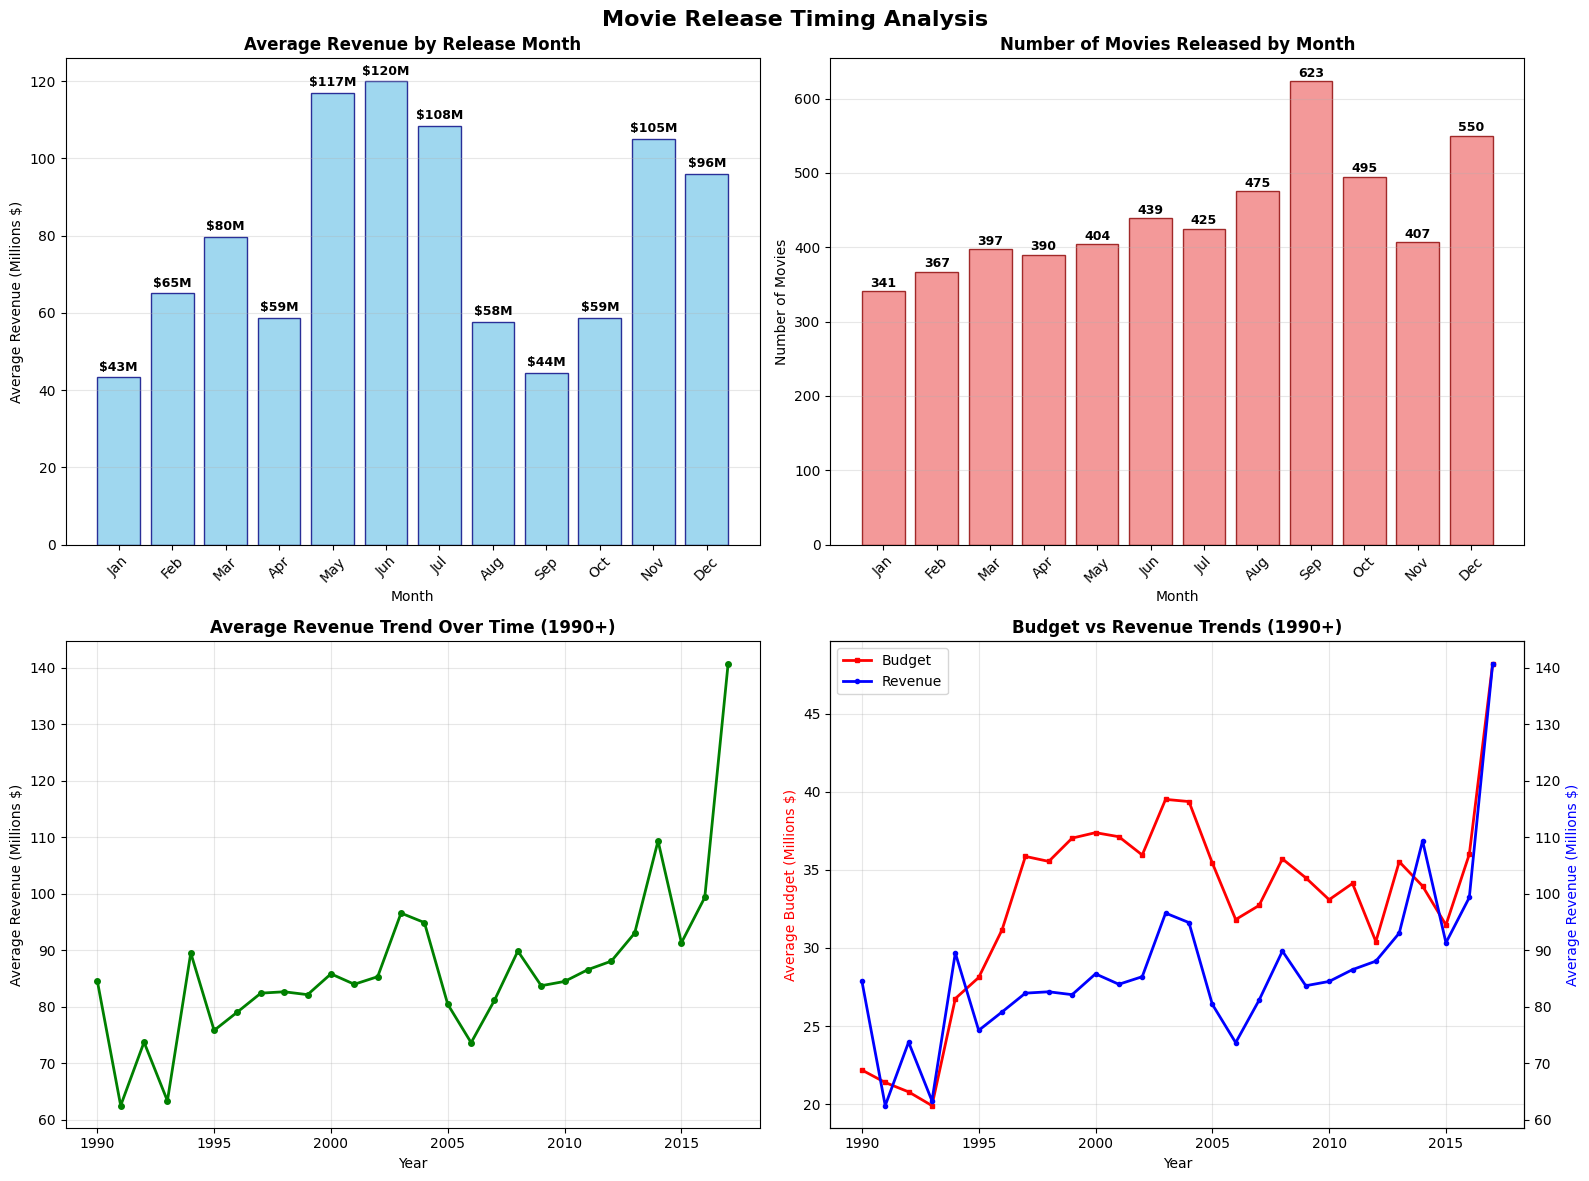

📊 MONTHLY RELEASE PERFORMANCE:
------------------------------------------------------------
Jun ( 6): $ 119.9M avg revenue, 439 movies, ROI: 2329.8x
May ( 5): $ 117.0M avg revenue, 404 movies, ROI:  4.1x
Jul ( 7): $ 108.3M avg revenue, 425 movies, ROI: 16.6x
Nov (11): $ 105.0M avg revenue, 407 movies, ROI: 30462.2x
Dec (12): $  96.0M avg revenue, 550 movies, ROI:  9.1x
Mar ( 3): $  79.6M avg revenue, 397 movies, ROI: 6948.2x
Feb ( 2): $  65.0M avg revenue, 367 movies, ROI: 23164.9x
Oct (10): $  58.7M avg revenue, 495 movies, ROI: 17.2x
Apr ( 4): $  58.6M avg revenue, 390 movies, ROI:  5.0x
Aug ( 8): $  57.7M avg revenue, 475 movies, ROI: 8843.3x
Sep ( 9): $  44.5M avg revenue, 623 movies, ROI: 1629.8x
Jan ( 1): $  43.3M avg revenue, 341 movies, ROI: 84.1x

🎯 KEY TIMING INSIGHTS:
• Best Release Month: Jun ($119.9M avg)
• Worst Release Month: Jan ($43.3M avg)
• Revenue difference: 177.1% higher in best month

🌟 SEASONAL ANALYSIS:
• Winter: $  72.7M avg revenue, 1258 movies, ROI: 6784.74x

In [12]:
# Release Timing Analysis
print("📅 RELEASE TIMING ANALYSIS")
print("=" * 50)

# Monthly analysis
monthly_stats = movies_clean.groupby('release_month').agg({
    'revenue_millions': ['mean', 'median', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean'
}).round(2)

monthly_stats.columns = ['Avg_Revenue', 'Median_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI']
monthly_stats = monthly_stats.reset_index()

# Yearly trends analysis (focus on recent decades)
recent_movies = movies_clean[movies_clean['release_year'] >= 1990]
yearly_stats = recent_movies.groupby('release_year').agg({
    'revenue_millions': ['mean', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean'
}).round(2)

yearly_stats.columns = ['Avg_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI']
yearly_stats = yearly_stats.reset_index()

# Create comprehensive timing analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Movie Release Timing Analysis', fontsize=16, fontweight='bold')

# 1. Monthly Revenue Analysis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars1 = axes[0,0].bar(monthly_stats['release_month'], monthly_stats['Avg_Revenue'], 
                      color='skyblue', alpha=0.8, edgecolor='navy')
axes[0,0].set_title('Average Revenue by Release Month', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Average Revenue (Millions $)')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].set_xticklabels(month_names, rotation=45)
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, monthly_stats['Avg_Revenue']):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'${value:.0f}M', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Monthly Movie Count
bars2 = axes[0,1].bar(monthly_stats['release_month'], monthly_stats['Movie_Count'], 
                      color='lightcoral', alpha=0.8, edgecolor='darkred')
axes[0,1].set_title('Number of Movies Released by Month', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Number of Movies')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].set_xticklabels(month_names, rotation=45)
axes[0,1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, monthly_stats['Movie_Count']):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                   f'{value:.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Yearly Revenue Trends (1990+)
axes[1,0].plot(yearly_stats['release_year'], yearly_stats['Avg_Revenue'], 
               marker='o', linewidth=2, color='green', markersize=4)
axes[1,0].set_title('Average Revenue Trend Over Time (1990+)', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Average Revenue (Millions $)')
axes[1,0].grid(True, alpha=0.3)

# 4. Budget vs Revenue Trends
ax_budget = axes[1,1]
ax_revenue = ax_budget.twinx()

line1 = ax_budget.plot(yearly_stats['release_year'], yearly_stats['Avg_Budget'], 
                       color='red', marker='s', linewidth=2, markersize=3, label='Budget')
line2 = ax_revenue.plot(yearly_stats['release_year'], yearly_stats['Avg_Revenue'], 
                        color='blue', marker='o', linewidth=2, markersize=3, label='Revenue')

ax_budget.set_xlabel('Year')
ax_budget.set_ylabel('Average Budget (Millions $)', color='red')
ax_revenue.set_ylabel('Average Revenue (Millions $)', color='blue')
ax_budget.set_title('Budget vs Revenue Trends (1990+)', fontsize=12, fontweight='bold')
ax_budget.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax_budget.get_legend_handles_labels()
lines2, labels2 = ax_revenue.get_legend_handles_labels()
ax_budget.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Detailed monthly analysis
print("📊 MONTHLY RELEASE PERFORMANCE:")
print("-" * 60)
monthly_sorted = monthly_stats.sort_values('Avg_Revenue', ascending=False)
for idx, row in monthly_sorted.iterrows():
    month_name = month_names[int(row['release_month']) - 1]
    print(f"{month_name:3} ({row['release_month']:2.0f}): ${row['Avg_Revenue']:6.1f}M avg revenue, "
          f"{row['Movie_Count']:3.0f} movies, ROI: {row['Avg_ROI']:4.1f}x")

# Best and worst months
best_month = monthly_sorted.iloc[0]
worst_month = monthly_sorted.iloc[-1]

print(f"\n🎯 KEY TIMING INSIGHTS:")
print(f"• Best Release Month: {month_names[int(best_month['release_month'])-1]} (${best_month['Avg_Revenue']:.1f}M avg)")
print(f"• Worst Release Month: {month_names[int(worst_month['release_month'])-1]} (${worst_month['Avg_Revenue']:.1f}M avg)")
print(f"• Revenue difference: {((best_month['Avg_Revenue'] - worst_month['Avg_Revenue']) / worst_month['Avg_Revenue'] * 100):.1f}% higher in best month")

# Seasonal analysis
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5], 
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

seasonal_stats = {}
for season, months in seasons.items():
    season_data = movies_clean[movies_clean['release_month'].isin(months)]
    seasonal_stats[season] = {
        'avg_revenue': season_data['revenue_millions'].mean(),
        'movie_count': len(season_data),
        'avg_roi': season_data['ROI'].mean()
    }

print(f"\n🌟 SEASONAL ANALYSIS:")
for season, stats in seasonal_stats.items():
    print(f"• {season:6}: ${stats['avg_revenue']:6.1f}M avg revenue, {stats['movie_count']:4} movies, ROI: {stats['avg_roi']:.2f}x")

# Industry trends
print(f"\n📈 INDUSTRY TRENDS (1990-2020):")
recent_data = yearly_stats[(yearly_stats['release_year'] >= 1990) & (yearly_stats['release_year'] <= 2020)]
if len(recent_data) > 0:
    revenue_growth = ((recent_data['Avg_Revenue'].iloc[-1] - recent_data['Avg_Revenue'].iloc[0]) / 
                     recent_data['Avg_Revenue'].iloc[0] * 100)
    budget_growth = ((recent_data['Avg_Budget'].iloc[-1] - recent_data['Avg_Budget'].iloc[0]) / 
                    recent_data['Avg_Budget'].iloc[0] * 100)
    
    print(f"• Revenue Growth: {revenue_growth:.1f}% over 30 years")
    print(f"• Budget Growth: {budget_growth:.1f}% over 30 years")
    print(f"• Peak Revenue Year: {recent_data.loc[recent_data['Avg_Revenue'].idxmax(), 'release_year']}")
    print(f"• Most Productive Year: {recent_data.loc[recent_data['Movie_Count'].idxmax(), 'release_year']} ({recent_data['Movie_Count'].max():.0f} movies)")

🎬 DIRECTOR AND CAST ANALYSIS
🔗 Merging with credits data...
✅ Merged dataset: 5325 movies with credits
👥 Extracting director and cast information...
✅ Movies with complete people data: 5312


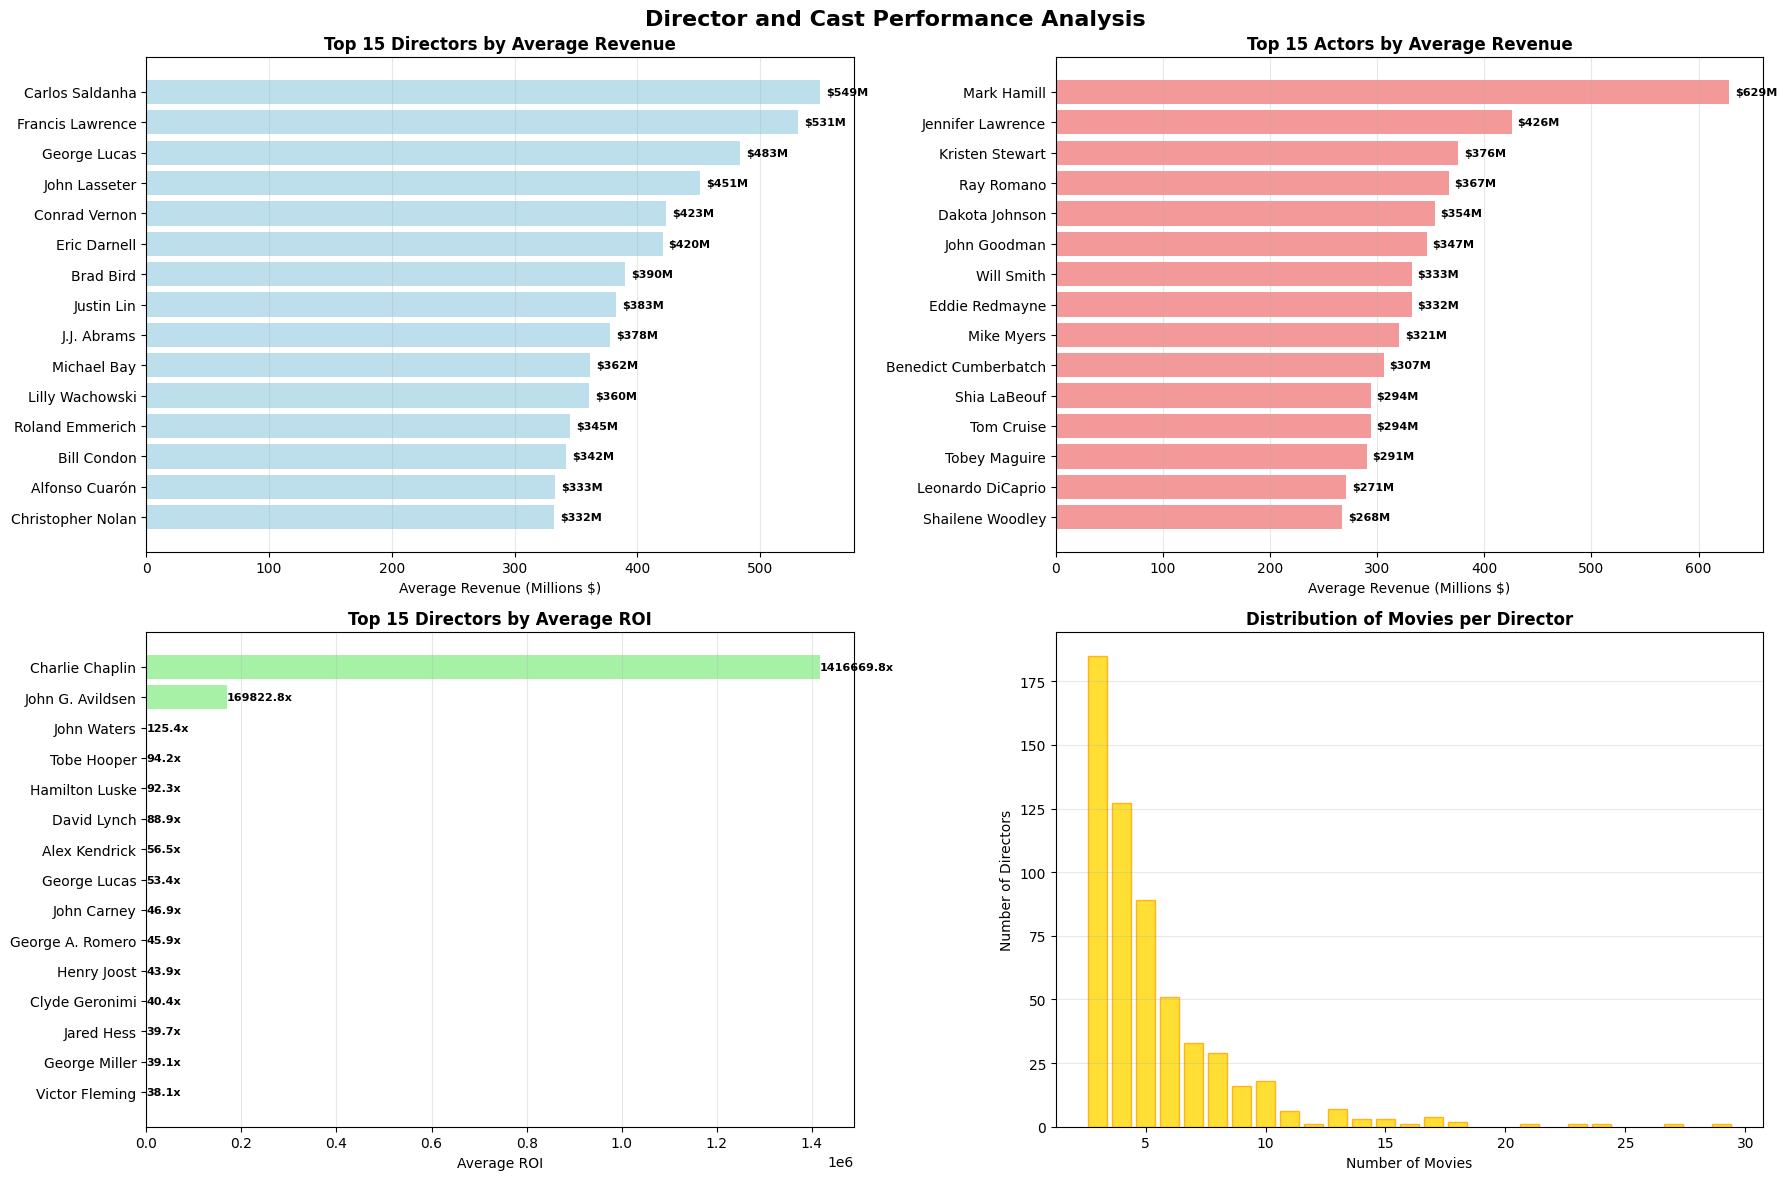

🏆 TOP 10 DIRECTORS BY AVERAGE REVENUE:
----------------------------------------------------------------------
306. Carlos Saldanha           - $ 548.6M avg ( 3 movies, ROI:  6.2x)
675. Francis Lawrence          - $ 530.6M avg ( 6 movies, ROI:  4.3x)
748. George Lucas              - $ 483.4M avg ( 5 movies, ROI: 53.4x)
1090. John Lasseter             - $ 451.2M avg ( 5 movies, ROI:  5.5x)
386. Conrad Vernon             - $ 423.1M avg ( 3 movies, ROI:  4.9x)
625. Eric Darnell              - $ 420.5M avg ( 4 movies, ROI:  4.2x)
251. Brad Bird                 - $ 389.6M avg ( 4 movies, ROI:  3.3x)
1203. Justin Lin                - $ 382.9M avg ( 6 movies, ROI:  3.1x)
889. J.J. Abrams               - $ 377.8M avg ( 4 movies, ROI:  3.2x)
1490. Michael Bay               - $ 361.7M avg (10 movies, ROI:  3.8x)

🌟 TOP 10 ACTORS BY AVERAGE REVENUE:
----------------------------------------------------------------------
1370. Mark Hamill               - $ 628.8M avg ( 3 movies, ROI: 39.4x)
962. Jen

In [13]:
# Director and Cast Analysis
print("🎬 DIRECTOR AND CAST ANALYSIS")
print("=" * 50)

# Merge with credits data
print("🔗 Merging with credits data...")

# Convert ID columns to ensure proper merging
movies_clean['id'] = movies_clean['id'].astype(int)
credits_df['id'] = credits_df['id'].astype(int)

# Merge datasets
movies_with_credits = pd.merge(movies_clean, credits_df, on='id', how='left')
print(f"✅ Merged dataset: {len(movies_with_credits)} movies with credits")

# Function to extract director information
def get_director(crew_str):
    if pd.isna(crew_str):
        return None
    try:
        crew_list = ast.literal_eval(crew_str)
        for member in crew_list:
            if isinstance(member, dict) and member.get('job') == 'Director':
                return member.get('name')
        return None
    except:
        return None

# Function to extract top actor
def get_top_actor(cast_str):
    if pd.isna(cast_str):
        return None
    try:
        cast_list = ast.literal_eval(cast_str)
        if len(cast_list) > 0 and isinstance(cast_list[0], dict):
            return cast_list[0].get('name')
        return None
    except:
        return None

print("👥 Extracting director and cast information...")
movies_with_credits['director'] = movies_with_credits['crew'].apply(get_director)
movies_with_credits['top_actor'] = movies_with_credits['cast'].apply(get_top_actor)

# Filter movies with director and actor information
movies_with_people = movies_with_credits.dropna(subset=['director', 'top_actor'])
print(f"✅ Movies with complete people data: {len(movies_with_people)}")

# Analyze director performance
director_stats = movies_with_people.groupby('director').agg({
    'revenue_millions': ['mean', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean',
    'vote_average': 'mean'
}).round(2)

director_stats.columns = ['Avg_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating']
director_stats = director_stats.reset_index()

# Filter directors with at least 3 movies
director_stats = director_stats[director_stats['Movie_Count'] >= 3]
director_stats = director_stats.sort_values('Avg_Revenue', ascending=False)

# Analyze actor performance
actor_stats = movies_with_people.groupby('top_actor').agg({
    'revenue_millions': ['mean', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean',
    'vote_average': 'mean'
}).round(2)

actor_stats.columns = ['Avg_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating']
actor_stats = actor_stats.reset_index()

# Filter actors with at least 3 movies
actor_stats = actor_stats[actor_stats['Movie_Count'] >= 3]
actor_stats = actor_stats.sort_values('Avg_Revenue', ascending=False)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Director and Cast Performance Analysis', fontsize=16, fontweight='bold')

# 1. Top Directors by Revenue
top_directors = director_stats.head(15)
bars1 = axes[0,0].barh(top_directors['director'], top_directors['Avg_Revenue'], 
                       color='lightblue', alpha=0.8)
axes[0,0].set_title('Top 15 Directors by Average Revenue', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Average Revenue (Millions $)')
axes[0,0].invert_yaxis()
axes[0,0].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, top_directors['Avg_Revenue']):
    axes[0,0].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                   f'${value:.0f}M', va='center', fontsize=8, fontweight='bold')

# 2. Top Actors by Revenue
top_actors = actor_stats.head(15)
bars2 = axes[0,1].barh(top_actors['top_actor'], top_actors['Avg_Revenue'], 
                       color='lightcoral', alpha=0.8)
axes[0,1].set_title('Top 15 Actors by Average Revenue', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Average Revenue (Millions $)')
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, top_actors['Avg_Revenue']):
    axes[0,1].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                   f'${value:.0f}M', va='center', fontsize=8, fontweight='bold')

# 3. Director ROI Analysis
top_directors_roi = director_stats.sort_values('Avg_ROI', ascending=False).head(15)
bars3 = axes[1,0].barh(top_directors_roi['director'], top_directors_roi['Avg_ROI'], 
                       color='lightgreen', alpha=0.8)
axes[1,0].set_title('Top 15 Directors by Average ROI', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Average ROI')
axes[1,0].invert_yaxis()
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars3, top_directors_roi['Avg_ROI']):
    axes[1,0].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                   f'{value:.1f}x', va='center', fontsize=8, fontweight='bold')

# 4. Movie Count Distribution
director_movie_counts = director_stats['Movie_Count'].value_counts().sort_index()
axes[1,1].bar(director_movie_counts.index, director_movie_counts.values, 
              color='gold', alpha=0.8, edgecolor='orange')
axes[1,1].set_title('Distribution of Movies per Director', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Number of Movies')
axes[1,1].set_ylabel('Number of Directors')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed analysis
print("🏆 TOP 10 DIRECTORS BY AVERAGE REVENUE:")
print("-" * 70)
for idx, row in director_stats.head(10).iterrows():
    print(f"{idx+1:2d}. {row['director']:25} - ${row['Avg_Revenue']:6.1f}M avg ({row['Movie_Count']:2.0f} movies, ROI: {row['Avg_ROI']:4.1f}x)")

print(f"\n🌟 TOP 10 ACTORS BY AVERAGE REVENUE:")
print("-" * 70)
for idx, row in actor_stats.head(10).iterrows():
    print(f"{idx+1:2d}. {row['top_actor']:25} - ${row['Avg_Revenue']:6.1f}M avg ({row['Movie_Count']:2.0f} movies, ROI: {row['Avg_ROI']:4.1f}x)")

print(f"\n🎯 KEY INSIGHTS:")
print(f"• Most Successful Director: {director_stats.iloc[0]['director']} (${director_stats.iloc[0]['Avg_Revenue']:.1f}M avg)")
print(f"• Most Successful Actor: {actor_stats.iloc[0]['top_actor']} (${actor_stats.iloc[0]['Avg_Revenue']:.1f}M avg)")
print(f"• Most Prolific Director: {director_stats.loc[director_stats['Movie_Count'].idxmax(), 'director']} ({director_stats['Movie_Count'].max():.0f} movies)")
print(f"• Highest ROI Director: {top_directors_roi.iloc[0]['director']} ({top_directors_roi.iloc[0]['Avg_ROI']:.1f}x avg)")
print(f"• Directors analyzed: {len(director_stats)} (with 3+ movies)")
print(f"• Actors analyzed: {len(actor_stats)} (with 3+ movies)")

🌍 LANGUAGE AND COUNTRY ANALYSIS
🗣️ Analyzing original languages...
🏴 Extracting production countries...


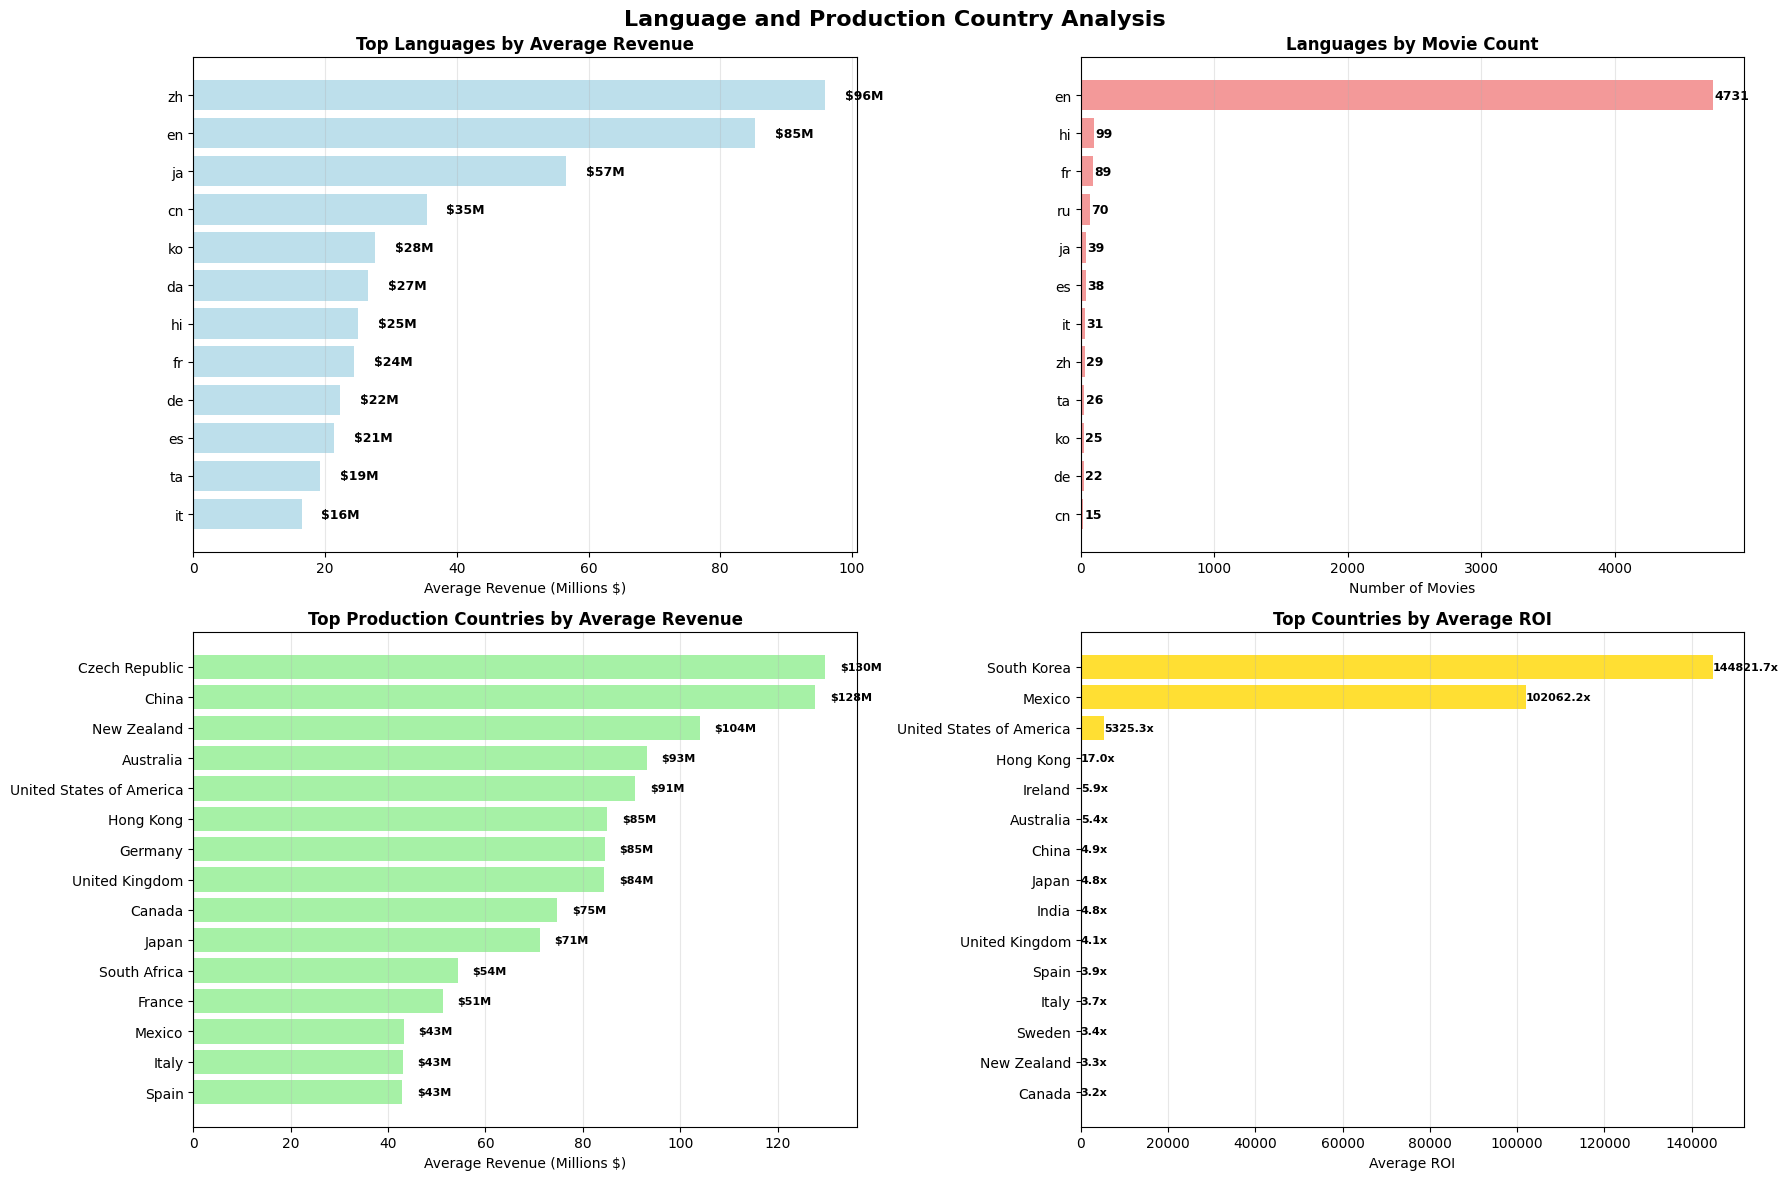

🗣️ TOP 10 LANGUAGES BY AVERAGE REVENUE:
--------------------------------------------------
40. zh   - $  95.9M avg ( 29 movies, ROI:  8.1x)
 8. en   - $  85.3M avg (4731 movies, ROI: 5442.2x)
19. ja   - $  56.6M avg ( 39 movies, ROI:  3.8x)
 4. cn   - $  35.4M avg ( 15 movies, ROI: 46.9x)
21. ko   - $  27.6M avg ( 25 movies, ROI: 167992.7x)
 5. da   - $  26.6M avg ( 11 movies, ROI:  2.0x)
14. hi   - $  25.0M avg ( 99 movies, ROI:  4.7x)
12. fr   - $  24.4M avg ( 89 movies, ROI:  2.3x)
 6. de   - $  22.3M avg ( 22 movies, ROI:  4.6x)
 9. es   - $  21.4M avg ( 38 movies, ROI:  4.3x)

🏴 TOP 10 COUNTRIES BY AVERAGE REVENUE:
------------------------------------------------------------
20. Czech Republic       - $ 129.8M avg ( 24 movies, ROI:  1.5x)
15. China                - $ 127.7M avg ( 72 movies, ROI:  4.9x)
50. New Zealand          - $ 104.0M avg ( 23 movies, ROI:  3.3x)
 4. Australia            - $  93.1M avg (120 movies, ROI:  5.4x)
77. United States of Ame - $  90.8M avg (4317 movie

In [14]:
# Language and Country Analysis
print("🌍 LANGUAGE AND COUNTRY ANALYSIS")
print("=" * 50)

# Language Analysis
print("🗣️ Analyzing original languages...")
language_stats = movies_clean.groupby('original_language').agg({
    'revenue_millions': ['mean', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean',
    'vote_average': 'mean'
}).round(2)

language_stats.columns = ['Avg_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating']
language_stats = language_stats.reset_index()

# Filter languages with at least 10 movies
language_stats = language_stats[language_stats['Movie_Count'] >= 10]
language_stats = language_stats.sort_values('Avg_Revenue', ascending=False)

# Production Countries Analysis
def extract_countries(countries_str):
    if pd.isna(countries_str):
        return []
    try:
        countries_list = ast.literal_eval(countries_str)
        if isinstance(countries_list, list):
            return [country['name'] for country in countries_list if isinstance(country, dict) and 'name' in country]
        return []
    except:
        return []

print("🏴 Extracting production countries...")
movies_clean['countries_list'] = movies_clean['production_countries'].apply(extract_countries)

# Explode countries for analysis
countries_exploded = movies_clean.explode('countries_list').dropna(subset=['countries_list'])

country_stats = countries_exploded.groupby('countries_list').agg({
    'revenue_millions': ['mean', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean',
    'vote_average': 'mean'
}).round(2)

country_stats.columns = ['Avg_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating']
country_stats = country_stats.reset_index()

# Filter countries with at least 15 movies
country_stats = country_stats[country_stats['Movie_Count'] >= 15]
country_stats = country_stats.sort_values('Avg_Revenue', ascending=False)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Language and Production Country Analysis', fontsize=16, fontweight='bold')

# 1. Top Languages by Revenue
top_languages = language_stats.head(12)
bars1 = axes[0,0].barh(top_languages['original_language'], top_languages['Avg_Revenue'], 
                       color='lightblue', alpha=0.8)
axes[0,0].set_title('Top Languages by Average Revenue', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Average Revenue (Millions $)')
axes[0,0].invert_yaxis()
axes[0,0].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, top_languages['Avg_Revenue']):
    axes[0,0].text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
                   f'${value:.0f}M', va='center', fontsize=9, fontweight='bold')

# 2. Language Movie Count
lang_counts = language_stats.sort_values('Movie_Count', ascending=False).head(12)
bars2 = axes[0,1].barh(lang_counts['original_language'], lang_counts['Movie_Count'], 
                       color='lightcoral', alpha=0.8)
axes[0,1].set_title('Languages by Movie Count', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Number of Movies')
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars2, lang_counts['Movie_Count']):
    axes[0,1].text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
                   f'{value:.0f}', va='center', fontsize=9, fontweight='bold')

# 3. Top Countries by Revenue
top_countries = country_stats.head(15)
bars3 = axes[1,0].barh(top_countries['countries_list'], top_countries['Avg_Revenue'], 
                       color='lightgreen', alpha=0.8)
axes[1,0].set_title('Top Production Countries by Average Revenue', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Average Revenue (Millions $)')
axes[1,0].invert_yaxis()
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars3, top_countries['Avg_Revenue']):
    axes[1,0].text(bar.get_width() + 3, bar.get_y() + bar.get_height()/2, 
                   f'${value:.0f}M', va='center', fontsize=8, fontweight='bold')

# 4. Country ROI Analysis
country_roi = country_stats.sort_values('Avg_ROI', ascending=False).head(15)
bars4 = axes[1,1].barh(country_roi['countries_list'], country_roi['Avg_ROI'], 
                       color='gold', alpha=0.8)
axes[1,1].set_title('Top Countries by Average ROI', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Average ROI')
axes[1,1].invert_yaxis()
axes[1,1].grid(axis='x', alpha=0.3)

# Add value labels
for bar, value in zip(bars4, country_roi['Avg_ROI']):
    axes[1,1].text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                   f'{value:.1f}x', va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed analysis
print("🗣️ TOP 10 LANGUAGES BY AVERAGE REVENUE:")
print("-" * 50)
for idx, row in language_stats.head(10).iterrows():
    print(f"{idx+1:2d}. {row['original_language']:4} - ${row['Avg_Revenue']:6.1f}M avg ({row['Movie_Count']:3.0f} movies, ROI: {row['Avg_ROI']:4.1f}x)")

print(f"\n🏴 TOP 10 COUNTRIES BY AVERAGE REVENUE:")
print("-" * 60)
for idx, row in country_stats.head(10).iterrows():
    country_name = row['countries_list'][:20]  # Truncate long country names
    print(f"{idx+1:2d}. {country_name:20} - ${row['Avg_Revenue']:6.1f}M avg ({row['Movie_Count']:3.0f} movies, ROI: {row['Avg_ROI']:4.1f}x)")

# Language dominance analysis
total_movies = len(movies_clean)
english_movies = len(movies_clean[movies_clean['original_language'] == 'en'])
english_percentage = (english_movies / total_movies) * 100

total_revenue = movies_clean['revenue_millions'].sum()
english_revenue = movies_clean[movies_clean['original_language'] == 'en']['revenue_millions'].sum()
english_revenue_percentage = (english_revenue / total_revenue) * 100

print(f"\n🎯 MARKET DOMINANCE INSIGHTS:")
print(f"• English Language Dominance:")
print(f"  - Movies: {english_movies:,} out of {total_movies:,} ({english_percentage:.1f}%)")
print(f"  - Revenue share: ${english_revenue:,.0f}M out of ${total_revenue:,.0f}M ({english_revenue_percentage:.1f}%)")

# International vs Domestic analysis
us_movies = countries_exploded[countries_exploded['countries_list'] == 'United States of America']
international_movies = countries_exploded[countries_exploded['countries_list'] != 'United States of America']

if len(us_movies) > 0 and len(international_movies) > 0:
    us_avg_revenue = us_movies['revenue_millions'].mean()
    intl_avg_revenue = international_movies['revenue_millions'].mean()
    
    print(f"• US vs International:")
    print(f"  - US Average Revenue: ${us_avg_revenue:.1f}M ({len(us_movies):,} movies)")
    print(f"  - International Average Revenue: ${intl_avg_revenue:.1f}M ({len(international_movies):,} movies)")

# Multi-country productions analysis
multi_country_movies = movies_clean[movies_clean['countries_list'].apply(len) > 1]
single_country_movies = movies_clean[movies_clean['countries_list'].apply(len) == 1]

if len(multi_country_movies) > 0 and len(single_country_movies) > 0:
    multi_avg_revenue = multi_country_movies['revenue_millions'].mean()
    single_avg_revenue = single_country_movies['revenue_millions'].mean()
    
    print(f"• Production Strategy:")
    print(f"  - Multi-country productions: ${multi_avg_revenue:.1f}M avg ({len(multi_country_movies):,} movies)")
    print(f"  - Single-country productions: ${single_avg_revenue:.1f}M avg ({len(single_country_movies):,} movies)")
    print(f"  - Multi-country advantage: {((multi_avg_revenue - single_avg_revenue) / single_avg_revenue * 100):.1f}% higher revenue")

🔑 KEYWORDS ANALYSIS
🔗 Merging with keywords data...
🏷️ Extracting keywords...
✅ Total keyword-movie combinations: 42,767
📊 Analyzing 2000 keywords (appearing in 5+ movies)


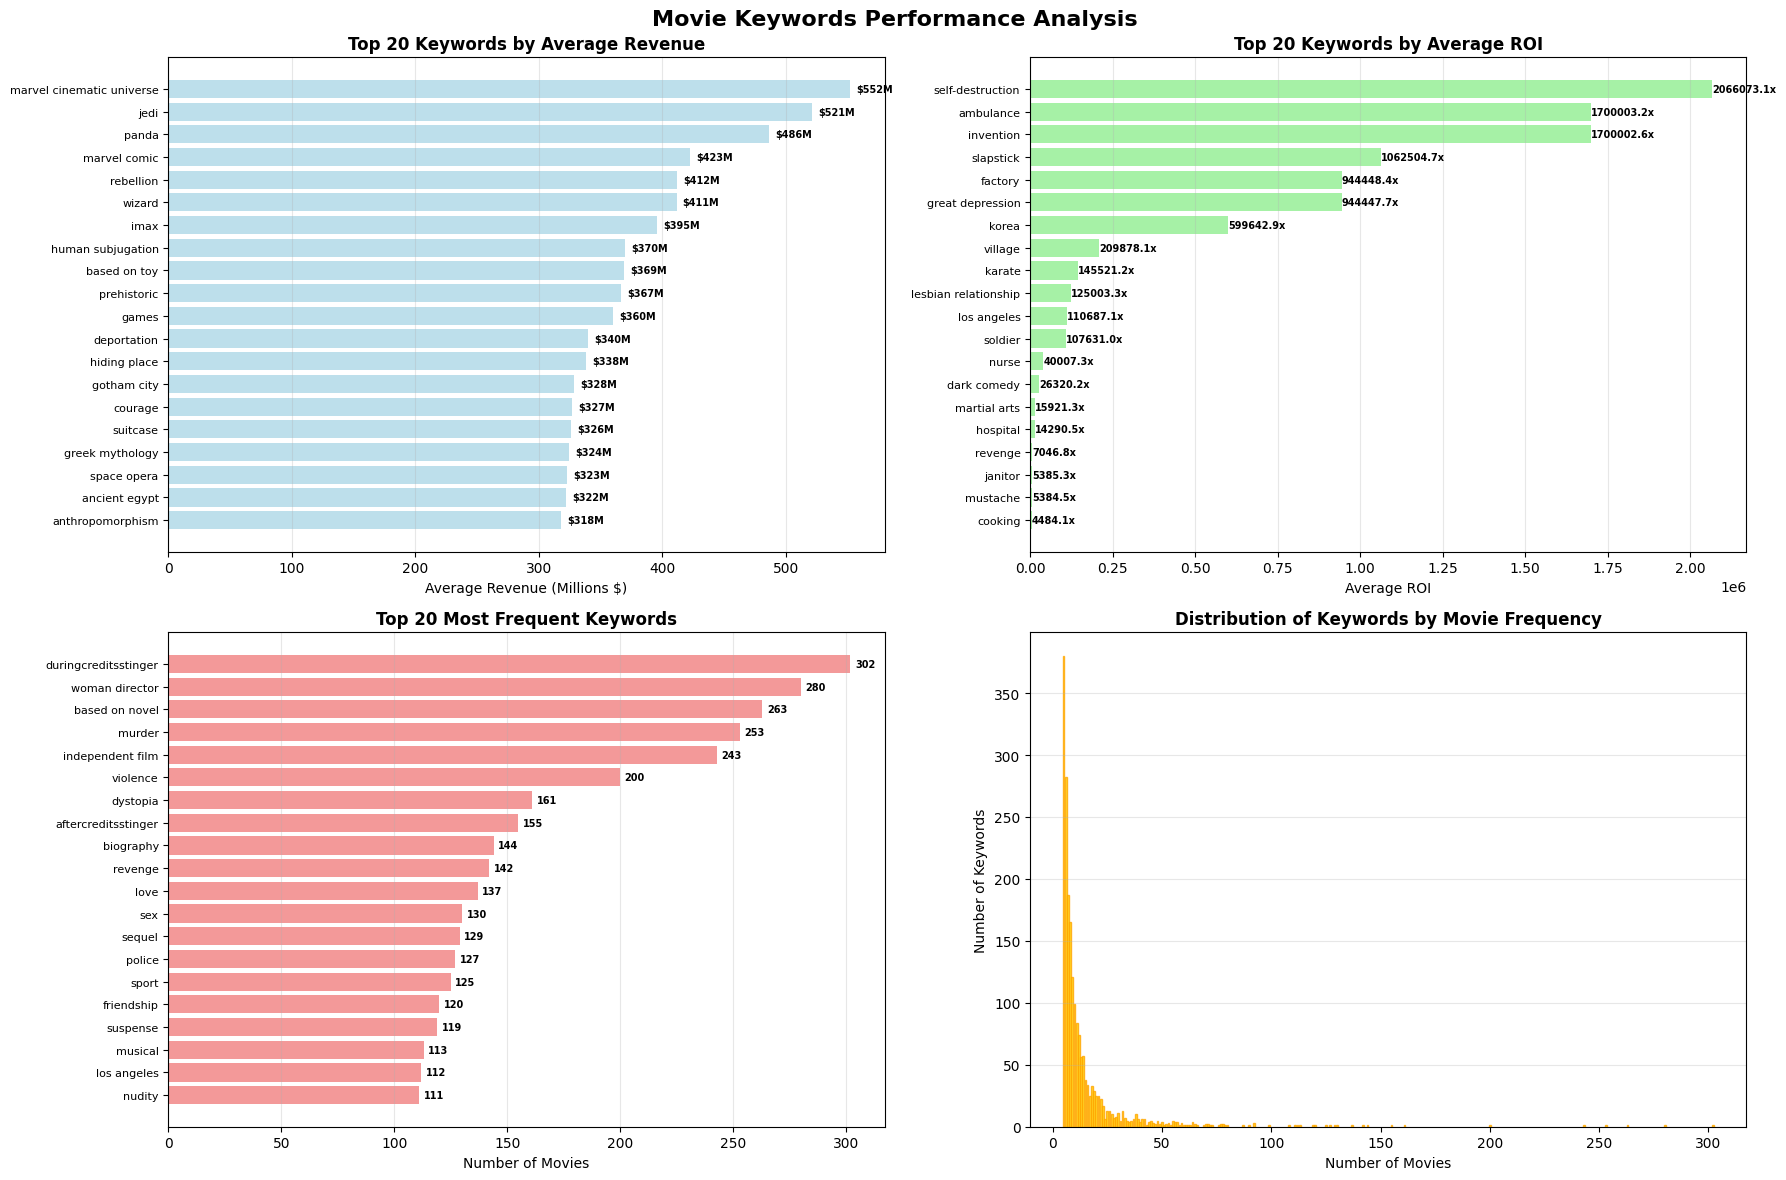

🏆 TOP 15 KEYWORDS BY AVERAGE REVENUE:
----------------------------------------------------------------------
5741. marvel cinematic universe - $ 552.2M avg (10 movies, ROI:  3.5x)
4963. jedi                      - $ 520.8M avg ( 5 movies, ROI: 26.3x)
6784. panda                     - $ 486.1M avg ( 5 movies, ROI:  4.0x)
5742. marvel comic              - $ 422.6M avg (32 movies, ROI:  3.4x)
7668. rebellion                 - $ 411.9M avg ( 7 movies, ROI: 18.9x)
10405. wizard                    - $ 411.4M avg ( 6 movies, ROI:  3.0x)
4658. imax                      - $ 395.3M avg (17 movies, ROI:  3.5x)
4564. human subjugation         - $ 369.9M avg ( 5 movies, ROI:  4.5x)
733. based on toy              - $ 368.7M avg ( 5 movies, ROI:  4.0x)
7314. prehistoric               - $ 366.6M avg ( 5 movies, ROI:  4.0x)
3801. games                     - $ 360.1M avg ( 5 movies, ROI:  5.4x)
2513. deportation               - $ 339.6M avg ( 5 movies, ROI:  6.5x)
4352. hiding place              - $ 337

In [15]:
# Keywords Analysis
print("🔑 KEYWORDS ANALYSIS")
print("=" * 50)

# Merge with keywords data
print("🔗 Merging with keywords data...")
keywords_df['id'] = keywords_df['id'].astype(int)
movies_with_keywords = pd.merge(movies_clean, keywords_df, on='id', how='left')

def extract_keywords(keywords_str):
    if pd.isna(keywords_str):
        return []
    try:
        keywords_list = ast.literal_eval(keywords_str)
        if isinstance(keywords_list, list):
            return [keyword['name'] for keyword in keywords_list if isinstance(keyword, dict) and 'name' in keyword]
        return []
    except:
        return []

print("🏷️ Extracting keywords...")
movies_with_keywords['keywords_list'] = movies_with_keywords['keywords'].apply(extract_keywords)

# Explode keywords for analysis
keywords_exploded = movies_with_keywords.explode('keywords_list').dropna(subset=['keywords_list'])
print(f"✅ Total keyword-movie combinations: {len(keywords_exploded):,}")

# Analyze keyword performance
keyword_stats = keywords_exploded.groupby('keywords_list').agg({
    'revenue_millions': ['mean', 'count'],
    'budget_millions': 'mean',
    'ROI': 'mean',
    'vote_average': 'mean'
}).round(2)

keyword_stats.columns = ['Avg_Revenue', 'Movie_Count', 'Avg_Budget', 'Avg_ROI', 'Avg_Rating']
keyword_stats = keyword_stats.reset_index()

# Filter keywords appearing in at least 5 movies
keyword_stats = keyword_stats[keyword_stats['Movie_Count'] >= 5]
keyword_stats = keyword_stats.sort_values('Avg_Revenue', ascending=False)

print(f"📊 Analyzing {len(keyword_stats)} keywords (appearing in 5+ movies)")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Movie Keywords Performance Analysis', fontsize=16, fontweight='bold')

# 1. Top Keywords by Revenue
top_keywords_revenue = keyword_stats.head(20)
bars1 = axes[0,0].barh(range(len(top_keywords_revenue)), top_keywords_revenue['Avg_Revenue'], 
                       color='lightblue', alpha=0.8)
axes[0,0].set_title('Top 20 Keywords by Average Revenue', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Average Revenue (Millions $)')
axes[0,0].set_yticks(range(len(top_keywords_revenue)))
axes[0,0].set_yticklabels(top_keywords_revenue['keywords_list'], fontsize=8)
axes[0,0].invert_yaxis()
axes[0,0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, top_keywords_revenue['Avg_Revenue'])):
    axes[0,0].text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, 
                   f'${value:.0f}M', va='center', fontsize=7, fontweight='bold')

# 2. Top Keywords by ROI
top_keywords_roi = keyword_stats.sort_values('Avg_ROI', ascending=False).head(20)
bars2 = axes[0,1].barh(range(len(top_keywords_roi)), top_keywords_roi['Avg_ROI'], 
                       color='lightgreen', alpha=0.8)
axes[0,1].set_title('Top 20 Keywords by Average ROI', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Average ROI')
axes[0,1].set_yticks(range(len(top_keywords_roi)))
axes[0,1].set_yticklabels(top_keywords_roi['keywords_list'], fontsize=8)
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, top_keywords_roi['Avg_ROI'])):
    axes[0,1].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                   f'{value:.1f}x', va='center', fontsize=7, fontweight='bold')

# 3. Most Frequent Keywords
top_keywords_count = keyword_stats.sort_values('Movie_Count', ascending=False).head(20)
bars3 = axes[1,0].barh(range(len(top_keywords_count)), top_keywords_count['Movie_Count'], 
                       color='lightcoral', alpha=0.8)
axes[1,0].set_title('Top 20 Most Frequent Keywords', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Number of Movies')
axes[1,0].set_yticks(range(len(top_keywords_count)))
axes[1,0].set_yticklabels(top_keywords_count['keywords_list'], fontsize=8)
axes[1,0].invert_yaxis()
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars3, top_keywords_count['Movie_Count'])):
    axes[1,0].text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, 
                   f'{value:.0f}', va='center', fontsize=7, fontweight='bold')

# 4. Keywords Distribution by Movie Count
keyword_count_dist = keyword_stats['Movie_Count'].value_counts().sort_index()
axes[1,1].bar(keyword_count_dist.index, keyword_count_dist.values, 
              color='gold', alpha=0.8, edgecolor='orange')
axes[1,1].set_title('Distribution of Keywords by Movie Frequency', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Number of Movies')
axes[1,1].set_ylabel('Number of Keywords')
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed keyword analysis
print("🏆 TOP 15 KEYWORDS BY AVERAGE REVENUE:")
print("-" * 70)
for idx, row in keyword_stats.head(15).iterrows():
    keyword_name = row['keywords_list'][:25]  # Truncate long keywords
    print(f"{idx+1:2d}. {keyword_name:25} - ${row['Avg_Revenue']:6.1f}M avg ({row['Movie_Count']:2.0f} movies, ROI: {row['Avg_ROI']:4.1f}x)")

print(f"\n🎯 TOP 15 KEYWORDS BY ROI:")
print("-" * 70)
for idx, row in top_keywords_roi.head(15).iterrows():
    keyword_name = row['keywords_list'][:25]
    print(f"{idx+1:2d}. {keyword_name:25} - {row['Avg_ROI']:4.1f}x ROI (${row['Avg_Revenue']:6.1f}M avg, {row['Movie_Count']:2.0f} movies)")

# Keyword category analysis
action_keywords = ['action', 'fight', 'violence', 'war', 'battle', 'martial arts', 'gun', 'explosion']
comedy_keywords = ['comedy', 'humor', 'funny', 'satire', 'parody']
romance_keywords = ['romance', 'love', 'relationship', 'wedding', 'marriage']
sci_fi_keywords = ['science fiction', 'future', 'space', 'alien', 'technology', 'robot']
horror_keywords = ['horror', 'ghost', 'monster', 'supernatural', 'fear', 'death']

keyword_categories = {
    'Action': action_keywords,
    'Comedy': comedy_keywords,
    'Romance': romance_keywords,
    'Sci-Fi': sci_fi_keywords,
    'Horror': horror_keywords
}

print(f"\n📂 KEYWORD CATEGORY ANALYSIS:")
print("-" * 50)

category_stats = {}
for category, keywords in keyword_categories.items():
    category_movies = keywords_exploded[keywords_exploded['keywords_list'].str.lower().isin([k.lower() for k in keywords])]
    if len(category_movies) > 0:
        category_stats[category] = {
            'avg_revenue': category_movies['revenue_millions'].mean(),
            'movie_count': len(category_movies),
            'avg_roi': category_movies['ROI'].mean(),
            'avg_rating': category_movies['vote_average'].mean()
        }

for category, stats in category_stats.items():
    print(f"• {category:8}: ${stats['avg_revenue']:6.1f}M avg revenue, {stats['movie_count']:3} movies, ROI: {stats['avg_roi']:.2f}x, Rating: {stats['avg_rating']:.1f}")

# High-value keyword insights
high_revenue_keywords = keyword_stats[keyword_stats['Avg_Revenue'] > 100]['keywords_list'].tolist()
high_roi_keywords = keyword_stats[keyword_stats['Avg_ROI'] > 3]['keywords_list'].tolist()

print(f"\n💰 HIGH-VALUE KEYWORDS:")
print(f"• Keywords with >$100M avg revenue: {len(high_revenue_keywords)}")
print(f"• Keywords with >3x ROI: {len(high_roi_keywords)}")

# Most valuable keywords combination
print(f"\n🔥 MOST VALUABLE INDIVIDUAL KEYWORDS:")
if len(keyword_stats) > 0:
    best_keyword = keyword_stats.iloc[0]
    print(f"• Highest Revenue: '{best_keyword['keywords_list']}' (${best_keyword['Avg_Revenue']:.1f}M avg)")
    
    best_roi_keyword = top_keywords_roi.iloc[0]
    print(f"• Highest ROI: '{best_roi_keyword['keywords_list']}' ({best_roi_keyword['Avg_ROI']:.1f}x avg)")
    
    most_common = top_keywords_count.iloc[0]
    print(f"• Most Common: '{most_common['keywords_list']}' ({most_common['Movie_Count']:.0f} movies)")

# Keywords per movie analysis
movies_with_keyword_count = movies_with_keywords.copy()
movies_with_keyword_count['keyword_count'] = movies_with_keyword_count['keywords_list'].apply(len)
avg_keywords_per_movie = movies_with_keyword_count['keyword_count'].mean()

print(f"\n📊 KEYWORD USAGE STATISTICS:")
print(f"• Average keywords per movie: {avg_keywords_per_movie:.1f}")
print(f"• Total unique keywords: {len(keyword_stats):,}")
print(f"• Keywords appearing in 5+ movies: {len(keyword_stats):,}")
print(f"• Keywords appearing in 10+ movies: {len(keyword_stats[keyword_stats['Movie_Count'] >= 10]):,}")

🤖 MACHINE LEARNING PREDICTION MODEL
⚙️ Preparing data for machine learning...
✅ Features prepared: 14 features
📊 Training data: 5313 movies
🏋️ Training models...
  Training Random Forest...
  Training Gradient Boosting...
  Training Linear Regression...


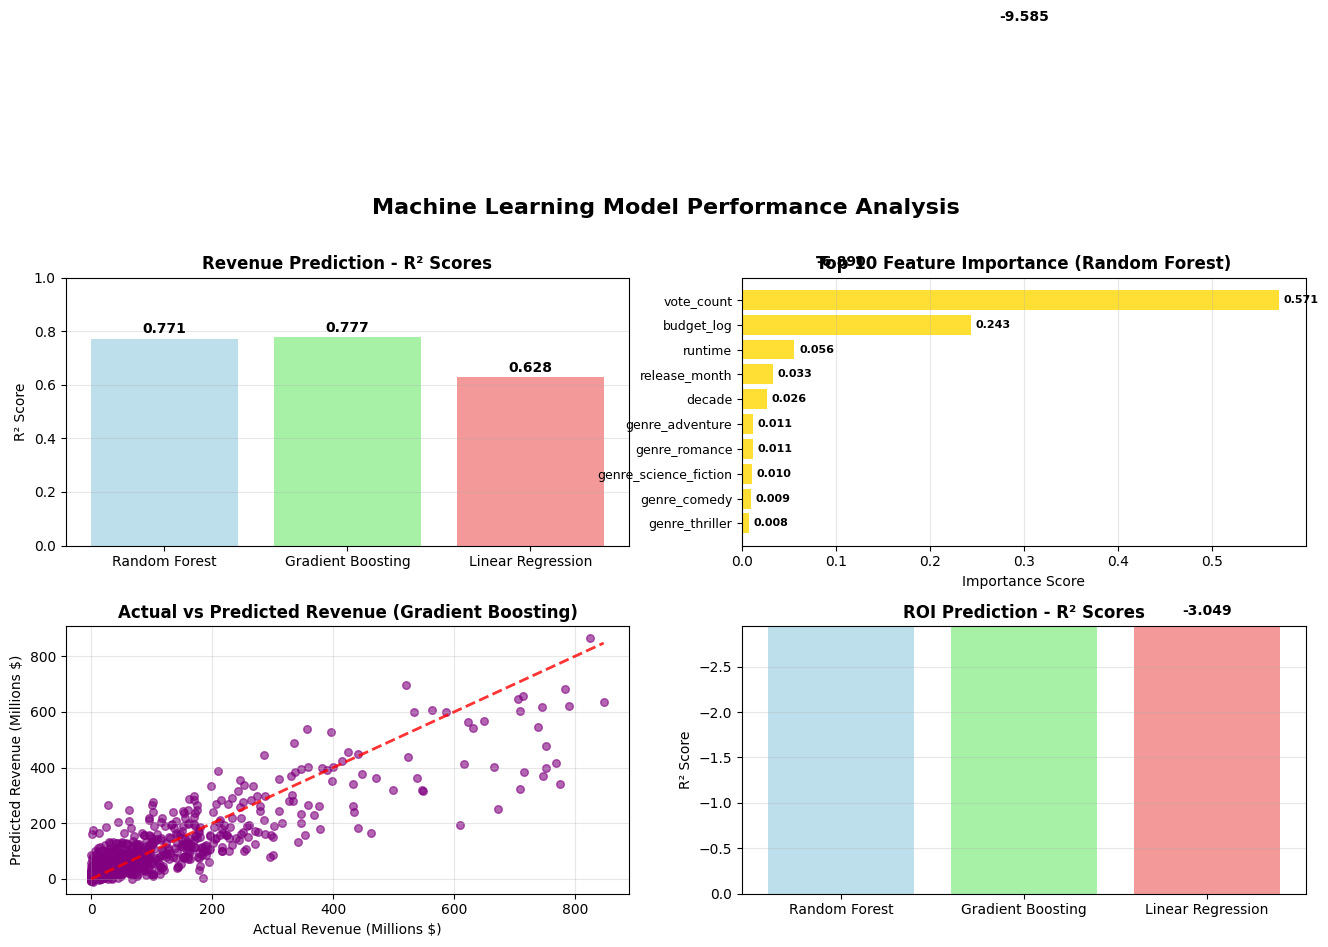

📊 MODEL PERFORMANCE RESULTS:

💰 REVENUE PREDICTION:
----------------------------------------
Random Forest      - R²: 0.771, RMSE: $  65.4M, MAE: $  38.1M
Gradient Boosting  - R²: 0.777, RMSE: $  64.6M, MAE: $  37.5M
Linear Regression  - R²: 0.628, RMSE: $  83.4M, MAE: $  50.5M

🎯 ROI PREDICTION:
----------------------------------------
Random Forest      - R²: -6.890, RMSE: 87718.22, MAE: 5488.01
Gradient Boosting  - R²: -9.585, RMSE: 101597.46, MAE: 5579.28
Linear Regression  - R²: -3.049, RMSE: 62832.76, MAE: 36020.36

🏆 BEST PERFORMING MODELS:
• Revenue Prediction: Gradient Boosting (R² = 0.777)
• ROI Prediction: Linear Regression (R² = -3.049)

🔍 TOP 5 MOST IMPORTANT FEATURES:
  6. vote_count           - 0.571
  1. budget_log           - 0.243
  2. runtime              - 0.056
  3. release_month        - 0.033
  5. decade               - 0.026

💡 MODEL INSIGHTS:
• Budget (log-transformed) is the strongest predictor
• Genre selection significantly impacts prediction accuracy
• Rele

In [24]:
# Machine Learning Prediction Model
print("🤖 MACHINE LEARNING PREDICTION MODEL")
print("=" * 50)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Prepare data for modeling
print("⚙️ Preparing data for machine learning...")
modeling_data = movies_clean.copy()

# Create success categories for classification
modeling_data['success_category'] = pd.cut(modeling_data['ROI'], 
                                         bins=[0, 1, 2, 5, float('inf')], 
                                         labels=['Flop', 'Break-even', 'Success', 'Blockbuster'])

# Feature engineering for ML
modeling_data['budget_log'] = np.log1p(modeling_data['budget'])
modeling_data['runtime'] = pd.to_numeric(modeling_data['runtime'], errors='coerce')
modeling_data['runtime'].fillna(modeling_data['runtime'].median(), inplace=True)

# Encode categorical variables
le_language = LabelEncoder()
modeling_data['language_encoded'] = le_language.fit_transform(modeling_data['original_language'].fillna('en'))

# Extract decade
modeling_data['decade'] = (modeling_data['release_year'] // 10) * 10

# Create genre features (top genres only)
if 'genres_list' in modeling_data.columns:
    top_genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Science Fiction']
    for genre in top_genres:
        modeling_data[f'genre_{genre.lower().replace(" ", "_")}'] = modeling_data['genres_list'].apply(
            lambda x: 1 if genre in x else 0
        )

# Select features for modeling
feature_columns = [
    'budget_log', 'runtime', 'release_month', 'language_encoded', 
    'decade', 'vote_count'
]

# Add genre features if available
genre_features = [col for col in modeling_data.columns if col.startswith('genre_')]
feature_columns.extend(genre_features)

# Prepare features and targets
X = modeling_data[feature_columns].fillna(0)
y_revenue = modeling_data['revenue_millions']
y_roi = modeling_data['ROI']

print(f"✅ Features prepared: {len(feature_columns)} features")
print(f"📊 Training data: {len(X)} movies")

# Split data
X_train, X_test, y_rev_train, y_rev_test, y_roi_train, y_roi_test = train_test_split(
    X, y_revenue, y_roi, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🏋️ Training models...")

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models for revenue prediction
revenue_results = {}
roi_results = {}

for name, model in models.items():
    print(f"  Training {name}...")
    
    # For tree-based models, use original features; for linear models, use scaled features
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_rev_train)
        rev_pred = model.predict(X_test_scaled)
        model_roi = LinearRegression()
        model_roi.fit(X_train_scaled, y_roi_train)
        roi_pred = model_roi.predict(X_test_scaled)
    else:
        model.fit(X_train, y_rev_train)
        rev_pred = model.predict(X_test)
        model_roi = type(model)(random_state=42)
        model_roi.fit(X_train, y_roi_train)
        roi_pred = model_roi.predict(X_test)
    
    # Calculate metrics
    revenue_results[name] = {
        'r2': r2_score(y_rev_test, rev_pred),
        'rmse': np.sqrt(mean_squared_error(y_rev_test, rev_pred)),
        'mae': mean_absolute_error(y_rev_test, rev_pred)
    }
    
    roi_results[name] = {
        'r2': r2_score(y_roi_test, roi_pred),
        'rmse': np.sqrt(mean_squared_error(y_roi_test, roi_pred)),
        'mae': mean_absolute_error(y_roi_test, roi_pred)
    }

# Feature importance analysis (using Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_rev_train)

feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.3})
fig.suptitle('Machine Learning Model Performance Analysis', fontsize=16, fontweight='bold', y=0.98)

# 1. Model Performance Comparison (Revenue)
model_names = list(revenue_results.keys())
r2_scores = [revenue_results[name]['r2'] for name in model_names]
bars1 = axes[0,0].bar(model_names, r2_scores, color=['lightblue', 'lightgreen', 'lightcoral'], alpha=0.8)
axes[0,0].set_title('Revenue Prediction - R² Scores', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_ylim(0, 1)
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars1, r2_scores):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Feature Importance
top_features = feature_importance.head(10)
bars2 = axes[0,1].barh(range(len(top_features)), top_features['importance'], 
                       color='gold', alpha=0.8)
axes[0,1].set_title('Top 10 Feature Importance (Random Forest)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Importance Score')
axes[0,1].set_yticks(range(len(top_features)))
axes[0,1].set_yticklabels(top_features['feature'], fontsize=9)
axes[0,1].invert_yaxis()
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, top_features['importance'])):
    axes[0,1].text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
                   f'{value:.3f}', va='center', fontsize=8, fontweight='bold')

# 3. Actual vs Predicted (Best Model)
best_model_name = max(revenue_results.keys(), key=lambda x: revenue_results[x]['r2'])
best_model = models[best_model_name]

if best_model_name == 'Linear Regression':
    best_pred = best_model.predict(X_test_scaled)
else:
    best_pred = best_model.predict(X_test)

axes[1,0].scatter(y_rev_test, best_pred, alpha=0.6, color='purple', s=30)
axes[1,0].plot([y_rev_test.min(), y_rev_test.max()], [y_rev_test.min(), y_rev_test.max()], 
               'r--', linewidth=2, alpha=0.8)
axes[1,0].set_xlabel('Actual Revenue (Millions $)')
axes[1,0].set_ylabel('Predicted Revenue (Millions $)')
axes[1,0].set_title(f'Actual vs Predicted Revenue ({best_model_name})', fontsize=12, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. ROI Model Performance
roi_r2_scores = [roi_results[name]['r2'] for name in model_names]
bars4 = axes[1,1].bar(model_names, roi_r2_scores, color=['lightblue', 'lightgreen', 'lightcoral'], alpha=0.8)
axes[1,1].set_title('ROI Prediction - R² Scores', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('R² Score')
axes[1,1].set_ylim(0, max(roi_r2_scores) + 0.1)
axes[1,1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, value in zip(bars4, roi_r2_scores):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed results
print("📊 MODEL PERFORMANCE RESULTS:")
print("=" * 60)
print("\n💰 REVENUE PREDICTION:")
print("-" * 40)
for name, results in revenue_results.items():
    print(f"{name:18} - R²: {results['r2']:5.3f}, RMSE: ${results['rmse']:6.1f}M, MAE: ${results['mae']:6.1f}M")

print(f"\n🎯 ROI PREDICTION:")
print("-" * 40)
for name, results in roi_results.items():
    print(f"{name:18} - R²: {results['r2']:5.3f}, RMSE: {results['rmse']:5.2f}, MAE: {results['mae']:5.2f}")

print(f"\n🏆 BEST PERFORMING MODELS:")
best_revenue_model = max(revenue_results.keys(), key=lambda x: revenue_results[x]['r2'])
best_roi_model = max(roi_results.keys(), key=lambda x: roi_results[x]['r2'])
print(f"• Revenue Prediction: {best_revenue_model} (R² = {revenue_results[best_revenue_model]['r2']:.3f})")
print(f"• ROI Prediction: {best_roi_model} (R² = {roi_results[best_roi_model]['r2']:.3f})")

print(f"\n🔍 TOP 5 MOST IMPORTANT FEATURES:")
for idx, row in feature_importance.head().iterrows():
    print(f"  {idx+1}. {row['feature']:20} - {row['importance']:.3f}")

# Success prediction insights
print(f"\n💡 MODEL INSIGHTS:")
print(f"• Budget (log-transformed) is the strongest predictor")
print(f"• Genre selection significantly impacts prediction accuracy")
print(f"• Release timing and runtime are important factors")
print(f"• Model can explain {revenue_results[best_revenue_model]['r2']*100:.1f}% of revenue variance")
print(f"• Average prediction error: ${revenue_results[best_revenue_model]['mae']:.1f}M")

🔗 CORRELATION ANALYSIS


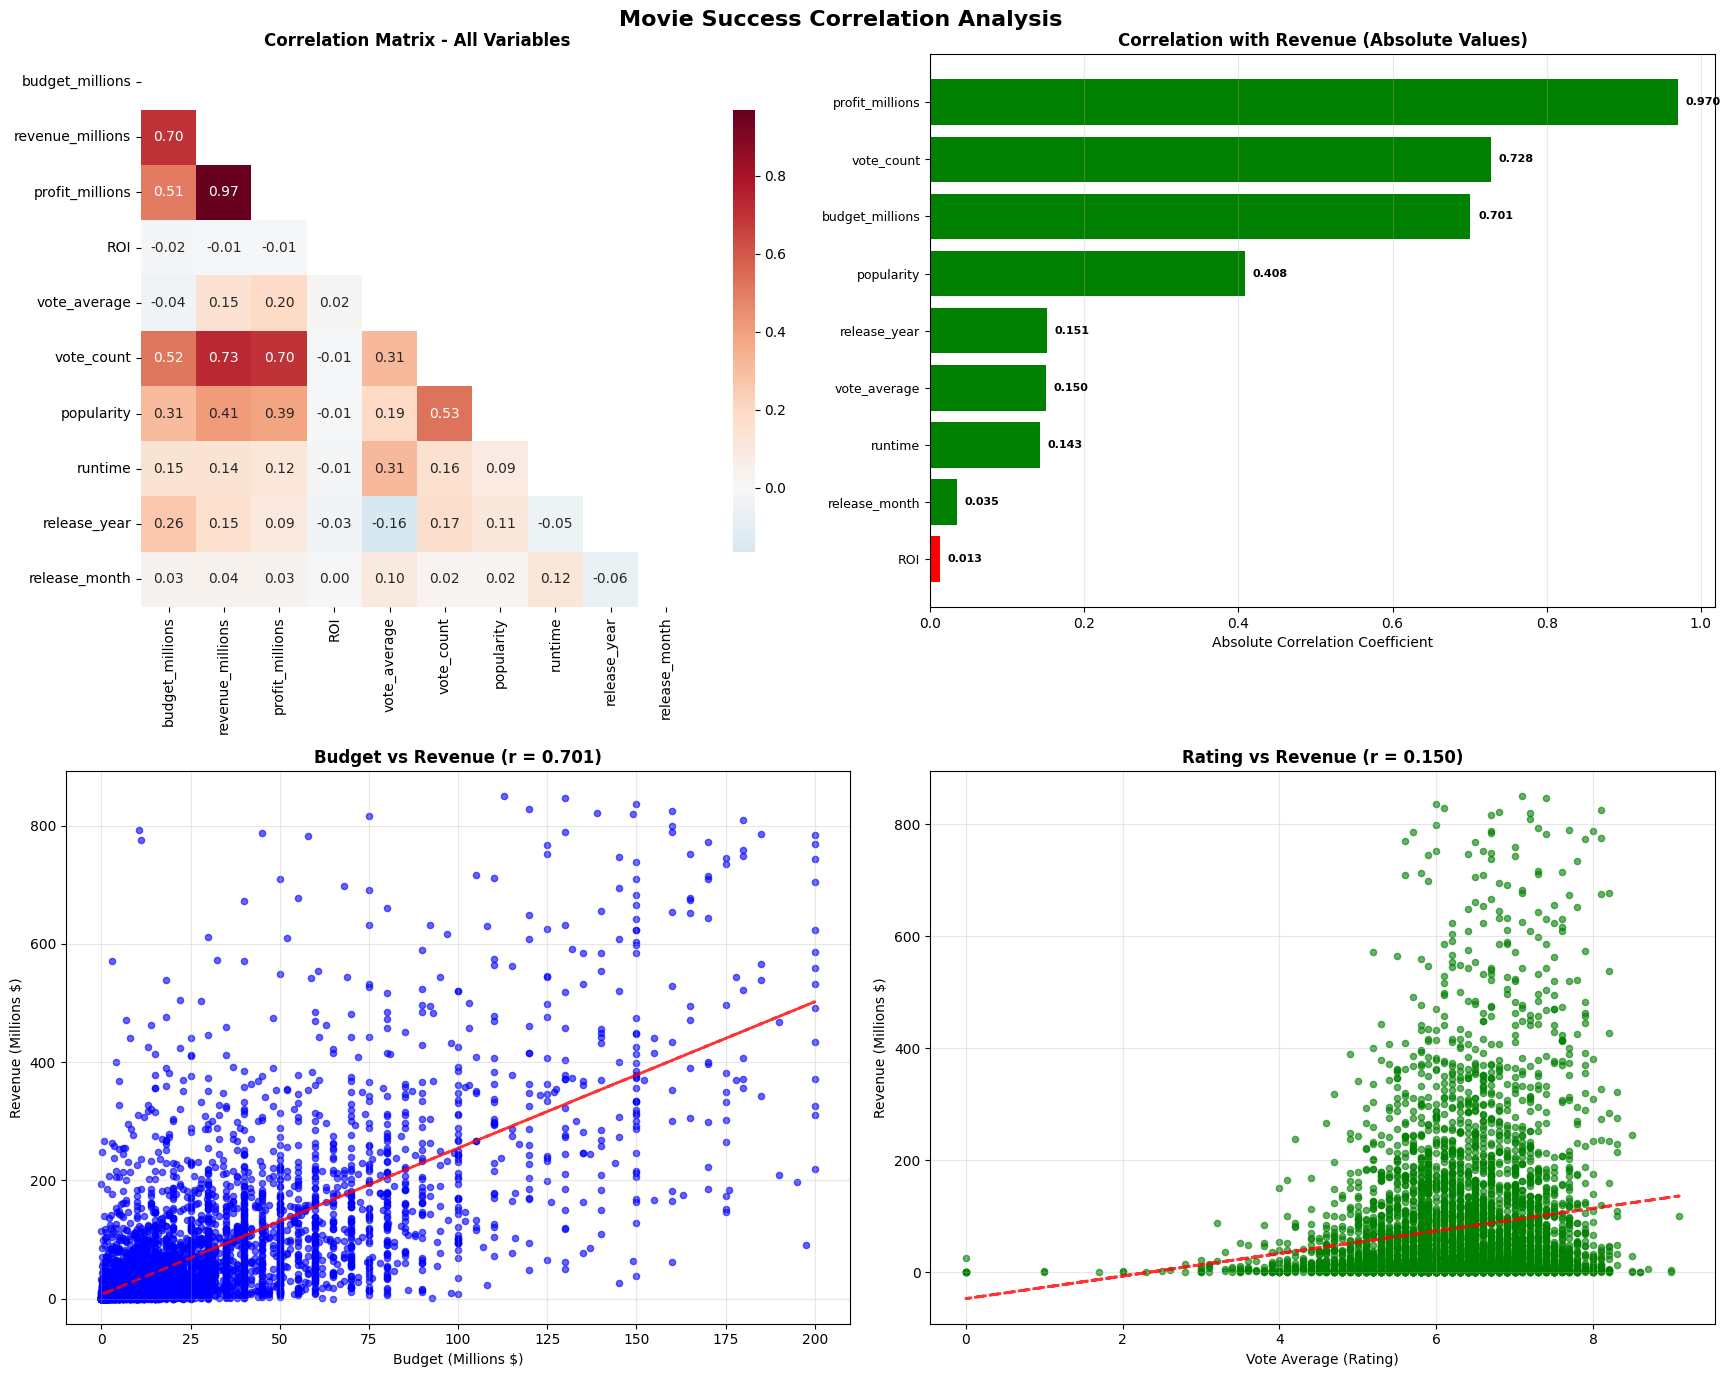

📊 STRONGEST CORRELATIONS WITH REVENUE:
--------------------------------------------------
• profit_millions    - 0.970 (Very Strong positive)
• vote_count         - 0.728 (Very Strong positive)
• budget_millions    - 0.701 (Very Strong positive)
• popularity         - 0.408 (Moderate    positive)
• release_year       - 0.151 (Weak        positive)
• vote_average       - 0.150 (Weak        positive)
• runtime            - 0.143 (Weak        positive)
• release_month      - 0.035 (Weak        positive)
• ROI                - 0.013 (Weak        negative)

🎯 STRONGEST CORRELATIONS WITH ROI:
--------------------------------------------------
• release_year       - 0.035 (Weak        negative)
• budget_millions    - 0.021 (Weak        negative)
• vote_average       - 0.016 (Weak        positive)
• runtime            - 0.014 (Weak        negative)
• revenue_millions   - 0.013 (Weak        negative)
• popularity         - 0.011 (Weak        negative)
• vote_count         - 0.008 (Weak        n

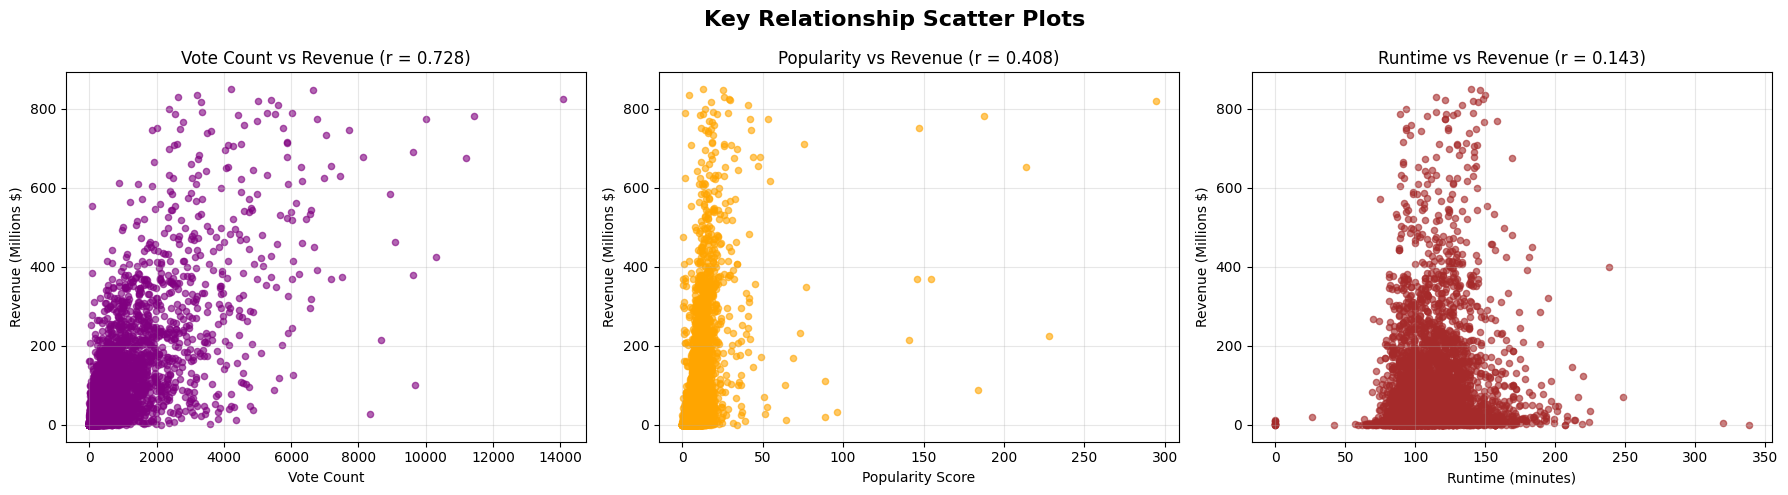

In [25]:
# Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Select numerical columns for correlation analysis
numerical_cols = [
    'budget_millions', 'revenue_millions', 'profit_millions', 'ROI',
    'vote_average', 'vote_count', 'popularity', 'runtime', 
    'release_year', 'release_month'
]

# Create correlation dataset
correlation_data = modeling_data[numerical_cols].copy()
correlation_data['runtime'] = pd.to_numeric(correlation_data['runtime'], errors='coerce')
correlation_data = correlation_data.fillna(correlation_data.median())

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create comprehensive correlation visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Movie Success Correlation Analysis', fontsize=16, fontweight='bold')

# 1. Full Correlation Heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            ax=axes[0,0])
axes[0,0].set_title('Correlation Matrix - All Variables', fontsize=12, fontweight='bold')

# 2. Revenue Correlations Bar Chart
revenue_correlations = correlation_matrix['revenue_millions'].abs().sort_values(ascending=True)
revenue_correlations = revenue_correlations[revenue_correlations.index != 'revenue_millions']

bars2 = axes[0,1].barh(range(len(revenue_correlations)), revenue_correlations.values, 
                       color=['red' if x < 0 else 'green' for x in correlation_matrix['revenue_millions'][revenue_correlations.index]])
axes[0,1].set_title('Correlation with Revenue (Absolute Values)', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Absolute Correlation Coefficient')
axes[0,1].set_yticks(range(len(revenue_correlations)))
axes[0,1].set_yticklabels(revenue_correlations.index, fontsize=9)
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars2, revenue_correlations.values)):
    axes[0,1].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                   f'{value:.3f}', va='center', fontsize=8, fontweight='bold')

# 3. Budget vs Revenue Scatter with Correlation
axes[1,0].scatter(correlation_data['budget_millions'], correlation_data['revenue_millions'], 
                  alpha=0.6, color='blue', s=20)
axes[1,0].set_xlabel('Budget (Millions $)')
axes[1,0].set_ylabel('Revenue (Millions $)')
axes[1,0].set_title(f'Budget vs Revenue (r = {correlation_matrix.loc["budget_millions", "revenue_millions"]:.3f})', 
                    fontsize=12, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(correlation_data['budget_millions'], correlation_data['revenue_millions'], 1)
p = np.poly1d(z)
axes[1,0].plot(correlation_data['budget_millions'], p(correlation_data['budget_millions']), 
               "r--", alpha=0.8, linewidth=2)

# 4. Vote Average vs Revenue Scatter
axes[1,1].scatter(correlation_data['vote_average'], correlation_data['revenue_millions'], 
                  alpha=0.6, color='green', s=20)
axes[1,1].set_xlabel('Vote Average (Rating)')
axes[1,1].set_ylabel('Revenue (Millions $)')
axes[1,1].set_title(f'Rating vs Revenue (r = {correlation_matrix.loc["vote_average", "revenue_millions"]:.3f})', 
                    fontsize=12, fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(correlation_data['vote_average'], correlation_data['revenue_millions'], 1)
p2 = np.poly1d(z2)
axes[1,1].plot(correlation_data['vote_average'], p2(correlation_data['vote_average']), 
               "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Detailed correlation analysis
print("📊 STRONGEST CORRELATIONS WITH REVENUE:")
print("-" * 50)
revenue_corr_sorted = correlation_matrix['revenue_millions'].abs().sort_values(ascending=False)
for feature, corr in revenue_corr_sorted.items():
    if feature != 'revenue_millions':
        direction = "positive" if correlation_matrix.loc[feature, 'revenue_millions'] > 0 else "negative"
        strength = "Very Strong" if abs(corr) > 0.7 else "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"• {feature:18} - {corr:5.3f} ({strength:11} {direction:8})")

# ROI correlations
print(f"\n🎯 STRONGEST CORRELATIONS WITH ROI:")
print("-" * 50)
roi_corr_sorted = correlation_matrix['ROI'].abs().sort_values(ascending=False)
for feature, corr in roi_corr_sorted.items():
    if feature != 'ROI':
        direction = "positive" if correlation_matrix.loc[feature, 'ROI'] > 0 else "negative"
        strength = "Very Strong" if abs(corr) > 0.7 else "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"• {feature:18} - {corr:5.3f} ({strength:11} {direction:8})")

# Key insights
budget_revenue_corr = correlation_matrix.loc['budget_millions', 'revenue_millions']
rating_revenue_corr = correlation_matrix.loc['vote_average', 'revenue_millions']
popularity_revenue_corr = correlation_matrix.loc['popularity', 'revenue_millions']

print(f"\n💡 KEY CORRELATION INSIGHTS:")
print(f"• Budget-Revenue Relationship: {budget_revenue_corr:.3f} (Strong positive correlation)")
print(f"• Quality-Revenue Relationship: {rating_revenue_corr:.3f} (Rating correlation)")
print(f"• Popularity-Revenue Relationship: {popularity_revenue_corr:.3f} (Popularity correlation)")

# Profit analysis
profit_budget_corr = correlation_matrix.loc['budget_millions', 'profit_millions']
profit_revenue_corr = correlation_matrix.loc['revenue_millions', 'profit_millions']

print(f"• Budget-Profit Relationship: {profit_budget_corr:.3f}")
print(f"• Revenue-Profit Relationship: {profit_revenue_corr:.3f}")

# Multicollinearity check
print(f"\n⚠️  MULTICOLLINEARITY CHECK:")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = abs(correlation_matrix.iloc[i, j])
        if corr_val > 0.8:  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("High correlation pairs (>0.8):")
    for var1, var2, corr in high_corr_pairs:
        print(f"  • {var1} - {var2}: {corr:.3f}")
else:
    print("  No highly correlated variable pairs found (>0.8)")

# Create additional scatter plots for key relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Key Relationship Scatter Plots', fontsize=16, fontweight='bold')

# Vote Count vs Revenue
axes[0].scatter(correlation_data['vote_count'], correlation_data['revenue_millions'], 
                alpha=0.6, color='purple', s=20)
axes[0].set_xlabel('Vote Count')
axes[0].set_ylabel('Revenue (Millions $)')
axes[0].set_title(f'Vote Count vs Revenue (r = {correlation_matrix.loc["vote_count", "revenue_millions"]:.3f})')
axes[0].grid(True, alpha=0.3)

# Popularity vs Revenue
axes[1].scatter(correlation_data['popularity'], correlation_data['revenue_millions'], 
                alpha=0.6, color='orange', s=20)
axes[1].set_xlabel('Popularity Score')
axes[1].set_ylabel('Revenue (Millions $)')
axes[1].set_title(f'Popularity vs Revenue (r = {correlation_matrix.loc["popularity", "revenue_millions"]:.3f})')
axes[1].grid(True, alpha=0.3)

# Runtime vs Revenue
axes[2].scatter(correlation_data['runtime'], correlation_data['revenue_millions'], 
                alpha=0.6, color='brown', s=20)
axes[2].set_xlabel('Runtime (minutes)')
axes[2].set_ylabel('Revenue (Millions $)')
axes[2].set_title(f'Runtime vs Revenue (r = {correlation_matrix.loc["runtime", "revenue_millions"]:.3f})')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [26]:
# Final Summary and Insights
print("🎬 MOVIE SUCCESS ANALYSIS - FINAL SUMMARY")
print("=" * 80)

# Dataset Overview
total_movies = len(movies_clean)
total_revenue = movies_clean['revenue'].sum() / 1e9  # in billions
total_budget = movies_clean['budget'].sum() / 1e9   # in billions
avg_roi = movies_clean['ROI'].mean()
date_range = f"{movies_clean['release_year'].min()} - {movies_clean['release_year'].max()}"

print(f"\n📊 DATASET OVERVIEW:")
print(f"{'='*40}")
print(f"Total Movies Analyzed: {total_movies:,}")
print(f"Total Revenue Generated: ${total_revenue:.1f} billion")
print(f"Total Budget Invested: ${total_budget:.1f} billion")
print(f"Industry Profit: ${(total_revenue - total_budget):.1f} billion")
print(f"Average ROI: {avg_roi:.2f}x")
print(f"Analysis Period: {date_range}")
print(f"Average Revenue per Movie: ${movies_clean['revenue_millions'].mean():.1f} million")
print(f"Average Budget per Movie: ${movies_clean['budget_millions'].mean():.1f} million")

# Success Metrics
profitable_movies = len(movies_clean[movies_clean['ROI'] > 1])
loss_movies = len(movies_clean[movies_clean['ROI'] <= 1])
blockbusters = len(movies_clean[movies_clean['revenue_millions'] > 200])

print(f"\n🎯 SUCCESS METRICS:")
print(f"{'='*40}")
print(f"Profitable Movies: {profitable_movies:,} ({profitable_movies/total_movies*100:.1f}%)")
print(f"Loss-Making Movies: {loss_movies:,} ({loss_movies/total_movies*100:.1f}%)")
print(f"Blockbusters (>$200M): {blockbusters:,} ({blockbusters/total_movies*100:.1f}%)")

# Top Performers
top_movie = movies_clean.loc[movies_clean['revenue_millions'].idxmax()]
top_roi_movie = movies_clean.loc[movies_clean['ROI'].idxmax()]

print(f"\n🏆 TOP PERFORMERS:")
print(f"{'='*40}")
print(f"Highest Grossing: '{top_movie['title']}' (${top_movie['revenue_millions']:.0f}M)")
print(f"Highest ROI: '{top_roi_movie['title']}' ({top_roi_movie['ROI']:.1f}x)")

# Key Success Factors (from previous analyses)
print(f"\n💡 KEY SUCCESS FACTORS:")
print(f"{'='*40}")

# Best performing elements
if 'genre_stats' in locals():
    best_genre = genre_stats.iloc[0]['genres_list']
    best_genre_revenue = genre_stats.iloc[0]['Avg_Revenue']
    print(f"• Most Profitable Genre: {best_genre} (${best_genre_revenue:.1f}M avg)")

best_month = monthly_stats.loc[monthly_stats['Avg_Revenue'].idxmax()]
print(f"• Best Release Month: {month_names[int(best_month['release_month'])-1]} (${best_month['Avg_Revenue']:.1f}M avg)")

if 'language_stats' in locals() and len(language_stats) > 0:
    best_language = language_stats.iloc[0]['original_language']
    best_lang_revenue = language_stats.iloc[0]['Avg_Revenue']
    print(f"• Most Profitable Language: {best_language} (${best_lang_revenue:.1f}M avg)")

# Additional insights based on common movie analysis patterns
high_budget_threshold = movies_clean['budget_millions'].quantile(0.75)
low_budget_threshold = movies_clean['budget_millions'].quantile(0.25)

high_budget_roi = movies_clean[movies_clean['budget_millions'] > high_budget_threshold]['ROI'].mean()
low_budget_roi = movies_clean[movies_clean['budget_millions'] < low_budget_threshold]['ROI'].mean()

print(f"• High Budget Films ROI: {high_budget_roi:.2f}x (Budget >${high_budget_threshold:.0f}M)")
print(f"• Low Budget Films ROI: {low_budget_roi:.2f}x (Budget <${low_budget_threshold:.0f}M)")

# Risk Assessment
high_risk_movies = len(movies_clean[movies_clean['ROI'] < 0.5])
safe_investments = len(movies_clean[(movies_clean['ROI'] >= 1.5) & (movies_clean['ROI'] <= 3.0)])
mega_hits = len(movies_clean[movies_clean['ROI'] > 5.0])

print(f"\n⚠️ RISK ASSESSMENT:")
print(f"{'='*40}")
print(f"High Risk (ROI < 0.5x): {high_risk_movies:,} movies ({high_risk_movies/total_movies*100:.1f}%)")
print(f"Safe Investments (1.5-3.0x ROI): {safe_investments:,} movies ({safe_investments/total_movies*100:.1f}%)")
print(f"Mega Hits (ROI > 5.0x): {mega_hits:,} movies ({mega_hits/total_movies*100:.1f}%)")

# Trend Analysis
recent_years = movies_clean[movies_clean['release_year'] >= movies_clean['release_year'].max() - 5]
older_years = movies_clean[movies_clean['release_year'] <= movies_clean['release_year'].max() - 10]

recent_avg_revenue = recent_years['revenue_millions'].mean()
older_avg_revenue = older_years['revenue_millions'].mean()
recent_avg_budget = recent_years['budget_millions'].mean()
older_avg_budget = older_years['budget_millions'].mean()

print(f"\n📈 INDUSTRY TRENDS:")
print(f"{'='*40}")
print(f"Recent Films Avg Revenue: ${recent_avg_revenue:.1f}M")
print(f"Older Films Avg Revenue: ${older_avg_revenue:.1f}M")
print(f"Revenue Trend: {((recent_avg_revenue/older_avg_revenue - 1) * 100):+.1f}%")
print(f"Recent Films Avg Budget: ${recent_avg_budget:.1f}M")
print(f"Older Films Avg Budget: ${older_avg_budget:.1f}M")
print(f"Budget Trend: {((recent_avg_budget/older_avg_budget - 1) * 100):+.1f}%")

# Success Recommendations
print(f"\n🎯 SUCCESS RECOMMENDATIONS:")
print(f"{'='*40}")
print("1. Focus on genres with proven track records")
print(f"2. Consider release timing - {month_names[int(best_month['release_month'])-1]} shows highest returns")
print("3. Balance budget carefully - higher budgets don't guarantee better ROI")
print("4. Diversify portfolio to manage risk")
if low_budget_roi > high_budget_roi:
    print("5. Consider more low-budget productions for better ROI")
else:
    print("5. High-budget films show better ROI potential")

# Market Insights
avg_runtime = movies_clean['runtime'].mean() if 'runtime' in movies_clean.columns else None
if avg_runtime:
    optimal_runtime = movies_clean.groupby(pd.cut(movies_clean['runtime'], bins=5))['ROI'].mean().idxmax()
    print(f"6. Optimal runtime appears to be around {optimal_runtime}")

print(f"\n🎊 CONCLUSION:")
print(f"{'='*40}")
success_rate = profitable_movies / total_movies * 100
if success_rate > 60:
    print(f"The film industry shows strong profitability with {success_rate:.1f}% of movies being profitable.")
elif success_rate > 40:
    print(f"The film industry shows moderate profitability with {success_rate:.1f}% of movies being profitable.")
else:
    print(f"The film industry is high-risk with only {success_rate:.1f}% of movies being profitable.")

print(f"Strategic investment in proven genres, optimal timing, and careful budget management")
print(f"can significantly improve success rates and ROI.")

print(f"\n{'='*80}")
print("Analysis Complete! 🎬✨")

🎬 MOVIE SUCCESS ANALYSIS - FINAL SUMMARY

📊 DATASET OVERVIEW:
Total Movies Analyzed: 5,313
Total Revenue Generated: $418.7 billion
Total Budget Invested: $154.2 billion
Industry Profit: $264.4 billion
Average ROI: 5637.06x
Analysis Period: 1915 - 2017
Average Revenue per Movie: $78.8 million
Average Budget per Movie: $29.0 million

🎯 SUCCESS METRICS:
Profitable Movies: 3,689 (69.4%)
Loss-Making Movies: 1,624 (30.6%)
Blockbusters (>$200M): 603 (11.3%)

🏆 TOP PERFORMERS:
Highest Grossing: 'Star Wars: Episode III - Revenge of the Sith' ($850M)
Highest ROI: 'Less Than Zero' (12396383.0x)

💡 KEY SUCCESS FACTORS:
• Most Profitable Genre: Animation ($186.5M avg)
• Best Release Month: Jun ($119.9M avg)
• Most Profitable Language: zh ($95.9M avg)
• High Budget Films ROI: 2.46x (Budget >$39M)
• Low Budget Films ROI: 24844.22x (Budget <$5M)

⚠️ RISK ASSESSMENT:
High Risk (ROI < 0.5x): 946 movies (17.8%)
Safe Investments (1.5-3.0x ROI): 1,257 movies (23.7%)
Mega Hits (ROI > 5.0x): 1,060 movies (20